In [5]:
%history -n 1-1000

   1: %history -n 1-1000
   2: %history -f C:\Users\DELL\Desktop\Aprendizaje_de_Maquina\jbook_Proyecto_Final_Clasificacion\Template_Jupyter_Book/historial_sesion.py
   3:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import matplotlib.colors as mcolors
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
   4:
# Ruta local a la carpeta donde están los archivos en Google Colab
ruta = r"C:\Users\DELL\Desktop\Aprendizaje_de_Maquina\Datos Originales"

# Cargar archivos CSV
train  = pd.read_csv(f'{ruta}/application_train.csv')
test   = pd.read_csv(f'{ruta}/application_test.csv')
bureau = pd.read_csv(f'{ruta}/bureau.csv')
bureau_balance = pd.read_csv(f'{ruta}/bureau_balance.csv')
previous_app   = pd.re

In [6]:
%history -f C:\Users\DELL\Desktop\Aprendizaje_de_Maquina\jbook_Proyecto_Final_Clasificacion\Template_Jupyter_Book/historial_sesion.py


# **1. Carga de Datos y Librerías**

### 1.1. Importar Librerías

In [7]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import matplotlib.colors as mcolors
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1.2. Cargar Datos desde Archivos CSV

In [8]:
# Ruta local a la carpeta donde están los archivos en Google Colab
ruta = r"C:\Users\DELL\Desktop\Aprendizaje_de_Maquina\home-credit-default-risk"

# Cargar archivos CSV
train  = pd.read_csv(f'{ruta}/application_train.csv')
test   = pd.read_csv(f'{ruta}/application_test.csv')
bureau = pd.read_csv(f'{ruta}/bureau.csv')
bureau_balance = pd.read_csv(f'{ruta}/bureau_balance.csv')
previous_app   = pd.read_csv(f'{ruta}/previous_application.csv')
pos_cash       = pd.read_csv(f'{ruta}/POS_CASH_balance.csv')
credit_card    = pd.read_csv(f'{ruta}/credit_card_balance.csv')
insta_payments = pd.read_csv(f'{ruta}/installments_payments.csv')

### 1.3. Agregación de Datos

In [9]:
# ================================
# 1. bureau
# ================================
bureau_agg = bureau.groupby("SK_ID_CURR").agg({
    "SK_ID_BUREAU": "count",
    "CREDIT_ACTIVE": "nunique",
    "AMT_CREDIT_SUM": "sum"
}).reset_index()

bureau_agg.columns = ["SK_ID_CURR", "bureau_count", "credit_active_unique", "total_credit_sum"]
train = train.merge(bureau_agg, on="SK_ID_CURR", how="left")
test  = test.merge(bureau_agg, on="SK_ID_CURR", how="left")

# ================================
# 2. previous_application
# ================================
previous_app_agg = previous_app.groupby("SK_ID_CURR").agg({
    "SK_ID_PREV": "count",
    "AMT_APPLICATION": "mean",
    "AMT_CREDIT": "sum"
}).reset_index()

previous_app_agg.columns = ["SK_ID_CURR", "prev_app_count", "avg_amt_app", "total_amt_credit"]
train = train.merge(previous_app_agg, on="SK_ID_CURR", how="left")
test  = test.merge(previous_app_agg, on="SK_ID_CURR", how="left")

# ================================
# 3. POS_CASH_balance
# ================================
pos_cash_agg = pos_cash.groupby("SK_ID_CURR").agg({
    "SK_ID_PREV": "count",
    "MONTHS_BALANCE": "mean"
}).reset_index()

pos_cash_agg.columns = ["SK_ID_CURR", "pos_cash_count", "avg_months_balance"]
train = train.merge(pos_cash_agg, on="SK_ID_CURR", how="left")
test  = test.merge(pos_cash_agg, on="SK_ID_CURR", how="left")

# ================================
# 4. credit_card_balance
# ================================
credit_card_agg = credit_card.groupby("SK_ID_CURR").agg({
    "SK_ID_PREV": "count",
    "AMT_BALANCE": "mean"
}).reset_index()

credit_card_agg.columns = ["SK_ID_CURR", "credit_card_count", "avg_credit_balance"]
train = train.merge(credit_card_agg, on="SK_ID_CURR", how="left")
test  = test.merge(credit_card_agg, on="SK_ID_CURR", how="left")

# ================================
# 5. installments_payments
# ================================
insta_payments_agg = insta_payments.groupby("SK_ID_CURR").agg({
    "SK_ID_PREV": "count",
    "AMT_PAYMENT": "sum",
    "DAYS_ENTRY_PAYMENT": "mean"
}).reset_index()

insta_payments_agg.columns = ["SK_ID_CURR", "installments_count", "total_amt_payment", "avg_days_entry_payment"]
train = train.merge(insta_payments_agg, on="SK_ID_CURR", how="left")
test  = test.merge(insta_payments_agg, on="SK_ID_CURR", how="left")

# ================================
# 6. Combinar train y test
# ================================
train["dataset"] = "train"
test["dataset"] = "test"
test["TARGET"] = np.nan

test = test[train.columns]  # Asegurar mismo orden de columnas
full_data = pd.concat([train, test], axis=0).reset_index(drop=True)

print("Datos combinados correctamente. Dimensiones:", full_data.shape)

Datos combinados correctamente. Dimensiones: (356255, 136)


### 1.4. Guardar Base de Datos Consolidada

In [10]:
# Guardar el dataset consolidado como CSV
full_data.to_csv('/content/credit_risk_consolidado.csv', index=False)
print("Archivo guardado exitosamente como 'credit_risk_consolidado.csv'")

Archivo guardado exitosamente como 'credit_risk_consolidado.csv'


# **2. Preprocesamiento de Datos**

## 2.1. Cargar Base de Datos Consolidada

In [11]:
# Cargar el archivo consolidado desde la ruta
df = pd.read_csv('/content/credit_risk_consolidado.csv')

# Verificar que se cargó correctamente
print("Dataset cargado correctamente. Dimensiones:", df.shape)

Dataset cargado correctamente. Dimensiones: (356255, 136)


## 2.2. Identificación de Tipos de Variables

In [12]:
def build_my_info_table(df):
    info = []
    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique()
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
        })

    return pd.DataFrame(info)

In [13]:
# Ejecutar la función sobre el DataFrame cargado
info_table = build_my_info_table(df)

# Mostrar la tabla con información descriptiva por columna
pd.set_option('display.max_rows', None)  # Para mostrar todas las filas si hay muchas variables
print("Dimensiones:", df.shape)
info_table.head(5)

Dimensiones: (356255, 136)


columna    dtype  nulos (#)  nulos (%)  nunique  \
0          SK_ID_CURR    int64          0       0.00   356255   
1              TARGET  float64      48744      13.68        2   
2  NAME_CONTRACT_TYPE   object          0       0.00        2   
3         CODE_GENDER   object          0       0.00        3   
4        FLAG_OWN_CAR   object          0       0.00        2   

                          unique  
0       Más de 10 valores únicos  
1                [1.0, 0.0, nan]  
2  [Cash loans, Revolving loans]  
3                    [M, F, XNA]  
4                         [N, Y]

In [14]:
# Cambiar estilo global de la fuente a una más formal
mpl.rcParams['font.family'] = 'serif'  # Usa fuente tipo LaTeX
mpl.rcParams['font.serif'] = ['Computer Modern', 'DejaVu Serif', 'Times New Roman', 'STIX']

# También puedes controlar tamaño por defecto si quieres
mpl.rcParams['font.size'] = 12

## 2.3. Selección de características

 ### 2.3.1. Eliminar Variable ID

In [15]:
# Eliminar la columna 'SK_ID_CURR'
df = df.drop(columns=['SK_ID_CURR'])

# Verificar dimensiones después de eliminar
print("'SK_ID_CURR' eliminada. Nueva dimensión:", df.shape)

'SK_ID_CURR' eliminada. Nueva dimensión: (356255, 135)


### 2.3.2. Eliminar Valores Nulos de la Variable Objetivo

In [16]:
# Mostrar distribución original (con nulos)
print(" Distribución original de la variable TARGET (incluye nulos):")
print(df['TARGET'].value_counts(dropna=False))

print("\n Distribución porcentual original (incluye nulos):")
print((df['TARGET'].value_counts(normalize=True, dropna=False) * 100).round(2))

# Eliminar nulos
df = df.dropna(subset=['TARGET'])

# Convertir a entero
df['TARGET'] = df['TARGET'].astype(int)

# Mostrar distribución después de limpieza
print("\n Distribución de TARGET después de eliminar nulos y convertir a entero:")
print(df['TARGET'].value_counts())

print("\n Distribución porcentual después de limpieza:")
print((df['TARGET'].value_counts(normalize=True) * 100).round(2))

# Mostrar dimensiones finales
print(f"\n Dimensiones del DataFrame final: {df.shape}")

 Distribución original de la variable TARGET (incluye nulos):
TARGET
0.0    282686
NaN     48744
1.0     24825
Name: count, dtype: int64

 Distribución porcentual original (incluye nulos):
TARGET
0.0    79.35
NaN    13.68
1.0     6.97
Name: proportion, dtype: float64

 Distribución de TARGET después de eliminar nulos y convertir a entero:
TARGET
0    282686
1     24825
Name: count, dtype: int64

 Distribución porcentual después de limpieza:
TARGET
0    91.93
1     8.07
Name: proportion, dtype: float64

 Dimensiones del DataFrame final: (307511, 135)


In [17]:
# Eliminar filas donde 'TARGET' es nulo
df = df[df['TARGET'].notnull()]

# Confirmar el cambio
print(f"Nuevo tamaño del DataFrame: {df.shape}")

print("Distribución de la variable TARGET:")
print(df['TARGET'].value_counts())
print("\nDistribución porcentual:")
print((df['TARGET'].value_counts(normalize=True) * 100).round(2))

Nuevo tamaño del DataFrame: (307511, 135)
Distribución de la variable TARGET:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Distribución porcentual:
TARGET
0    91.93
1     8.07
Name: proportion, dtype: float64


### 2.3.3. Eliminar columnas con más del 40% de valores nulos.


In [18]:
# Filtrar casos donde TARGET == 1
df_target_1 = df[df['TARGET'] == 1]

# Mostrar las dimensiones
print("Dimensiones del subconjunto con TARGET == 1:", df_target_1.shape)

Dimensiones del subconjunto con TARGET == 1: (24825, 135)


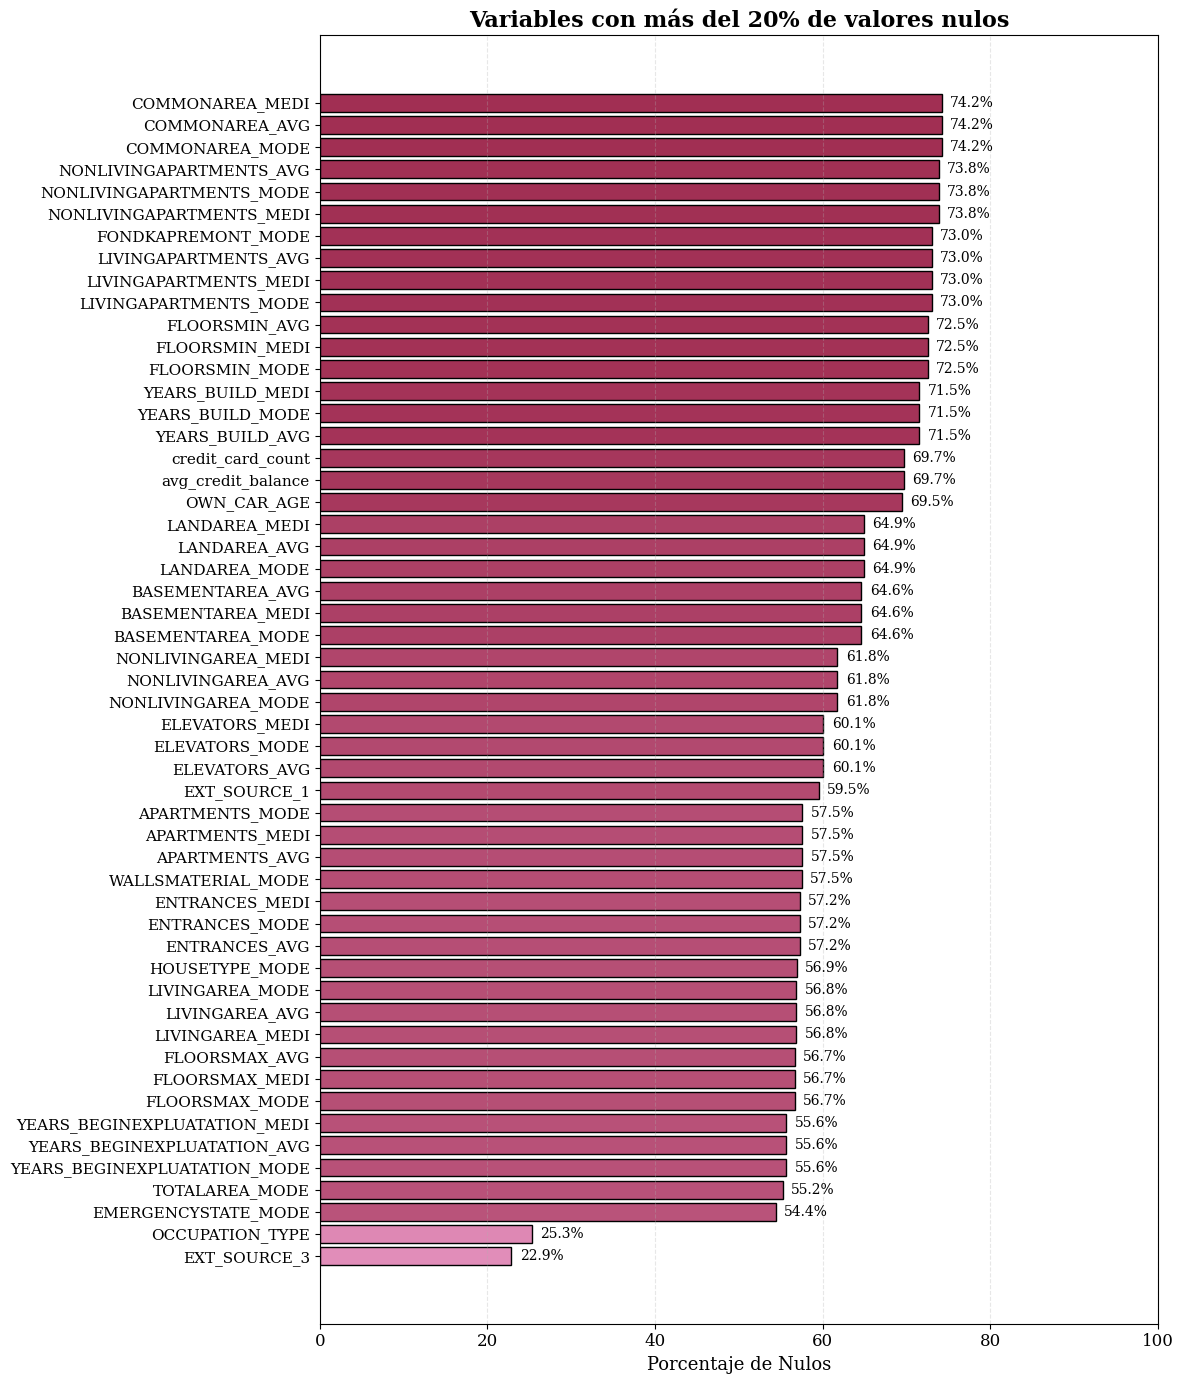

In [19]:
# Preparar los datos
na_counts = df_target_1.isna().sum()
na_pct = 100 * na_counts / len(df_target_1)

na_df = pd.DataFrame({
    'columna': na_pct.index,
    'nulos': na_pct.values
})

na_df = na_df[na_df['nulos'] >= 20].sort_values(by='nulos', ascending=True).reset_index(drop=True)

# Crear el gráfico


fig, ax = plt.subplots(figsize=(12, 14))

cmap = mcolors.LinearSegmentedColormap.from_list("vino_pastel", ["#feb6e6", "#800020"])
norm = plt.Normalize(0, 100)

for i, (col, val, nul) in enumerate(zip(na_df['columna'], na_df['nulos'], na_df['nulos'])):
    ax.barh(i, val, color=cmap(norm(val)), height=0.8, edgecolor='black')
    ax.text(val + 1, i, f'{val:.1f}%', va='center', ha='left', fontsize=10)

ax.set_yticks(np.arange(len(na_df)))
ax.set_yticklabels(na_df['columna'], fontsize=11)
ax.set_xlim(0, 100)
ax.set_xlabel("Porcentaje de Nulos", fontsize=13)
ax.set_title("Variables con más del 20% de valores nulos", fontsize=16, fontweight='bold')
ax.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:
# 1. Filtrar columnas con más del 40% de nulos
columnas_nulos_40 = na_pct[na_pct > 40].index.tolist()

# 2. Eliminar esas columnas del DataFrame completo df
df = df.drop(columns=columnas_nulos_40, errors='ignore')

# 3. Confirmar resultado
print(f"Columnas eliminadas por tener más del 40% de nulos (en TARGET==1): {len(columnas_nulos_40)}")
print(f"Dimensiones actualizadas de df: {df.shape}")

Columnas eliminadas por tener más del 40% de nulos (en TARGET==1): 51
Dimensiones actualizadas de df: (307511, 84)


### 2.3.4. Eliminar variables con una sola categoría o donde una categoría domina >90%.

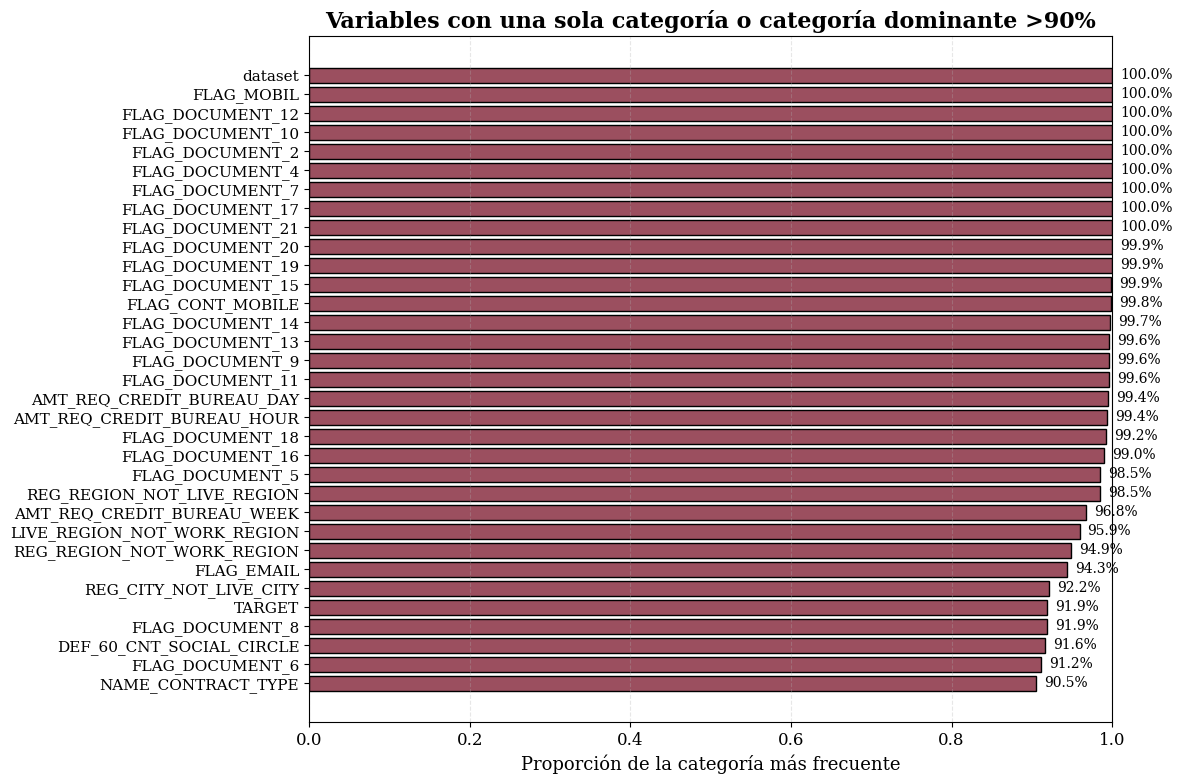

In [21]:
# Paso 1: Identificar columnas con una categoría dominante >90% (excluyendo NA)
umbral = 0.90
columnas_dominantes = {}

for col in df.columns:
    valores = df[col].dropna().value_counts(normalize=True)
    if len(valores) == 1:
        columnas_dominantes[col] = 1.0
    elif valores.iloc[0] > umbral:
        columnas_dominantes[col] = valores.iloc[0]

# Convertir a DataFrame ordenado
dom_df = pd.DataFrame({
    'columna': list(columnas_dominantes.keys()),
    'proporcion': list(columnas_dominantes.values())
}).sort_values(by='proporcion', ascending=True).reset_index(drop=True)

# Paso 2: Graficar con color fijo
fig, ax = plt.subplots(figsize=(12, 8))

color_fijo = "#9B4F5F"  # Color sólido vino oscuro

for i, (col, val) in enumerate(zip(dom_df['columna'], dom_df['proporcion'])):
    ax.barh(i, val, color=color_fijo, height=0.8, edgecolor='black')
    ax.text(val + 0.01, i, f'{val:.1%}', va='center', ha='left', fontsize=10)

# Estética del gráfico
ax.set_yticks(np.arange(len(dom_df)))
ax.set_yticklabels(dom_df['columna'], fontsize=11)
ax.set_xlim(0, 1)
ax.set_xlabel("Proporción de la categoría más frecuente", fontsize=13)
ax.set_title("Variables con una sola categoría o categoría dominante >90%", fontsize=16, fontweight='bold')
ax.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



In [22]:
# Inicializar lista para guardar columnas a eliminar
columnas_dominantes = []

# Iterar sobre las columnas del DataFrame
for col in df.columns:
    # Excluir NaNs y contar frecuencia de valores
    valores = df[col].dropna().value_counts(normalize=True)

    # Revisar condiciones:
    if len(valores) == 1:
        columnas_dominantes.append(col)  # Solo una categoría (sin contar NaNs)
    elif valores.iloc[0] > 0.999:
        columnas_dominantes.append(col)  # Una categoría domina más del 99.9%

# Mostrar resultado
print(f"Columnas a eliminar por tener una sola categoría dominante (>99%): {len(columnas_dominantes)}")
print(columnas_dominantes)

# Eliminar del DataFrame
df = df.drop(columns=columnas_dominantes, errors='ignore')
print(f"Nuevas dimensiones del DataFrame: {df.shape}")


Columnas a eliminar por tener una sola categoría dominante (>99%): 11
['FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'dataset']
Nuevas dimensiones del DataFrame: (307511, 73)


### 2.3.5. Alta correlación con otras variables

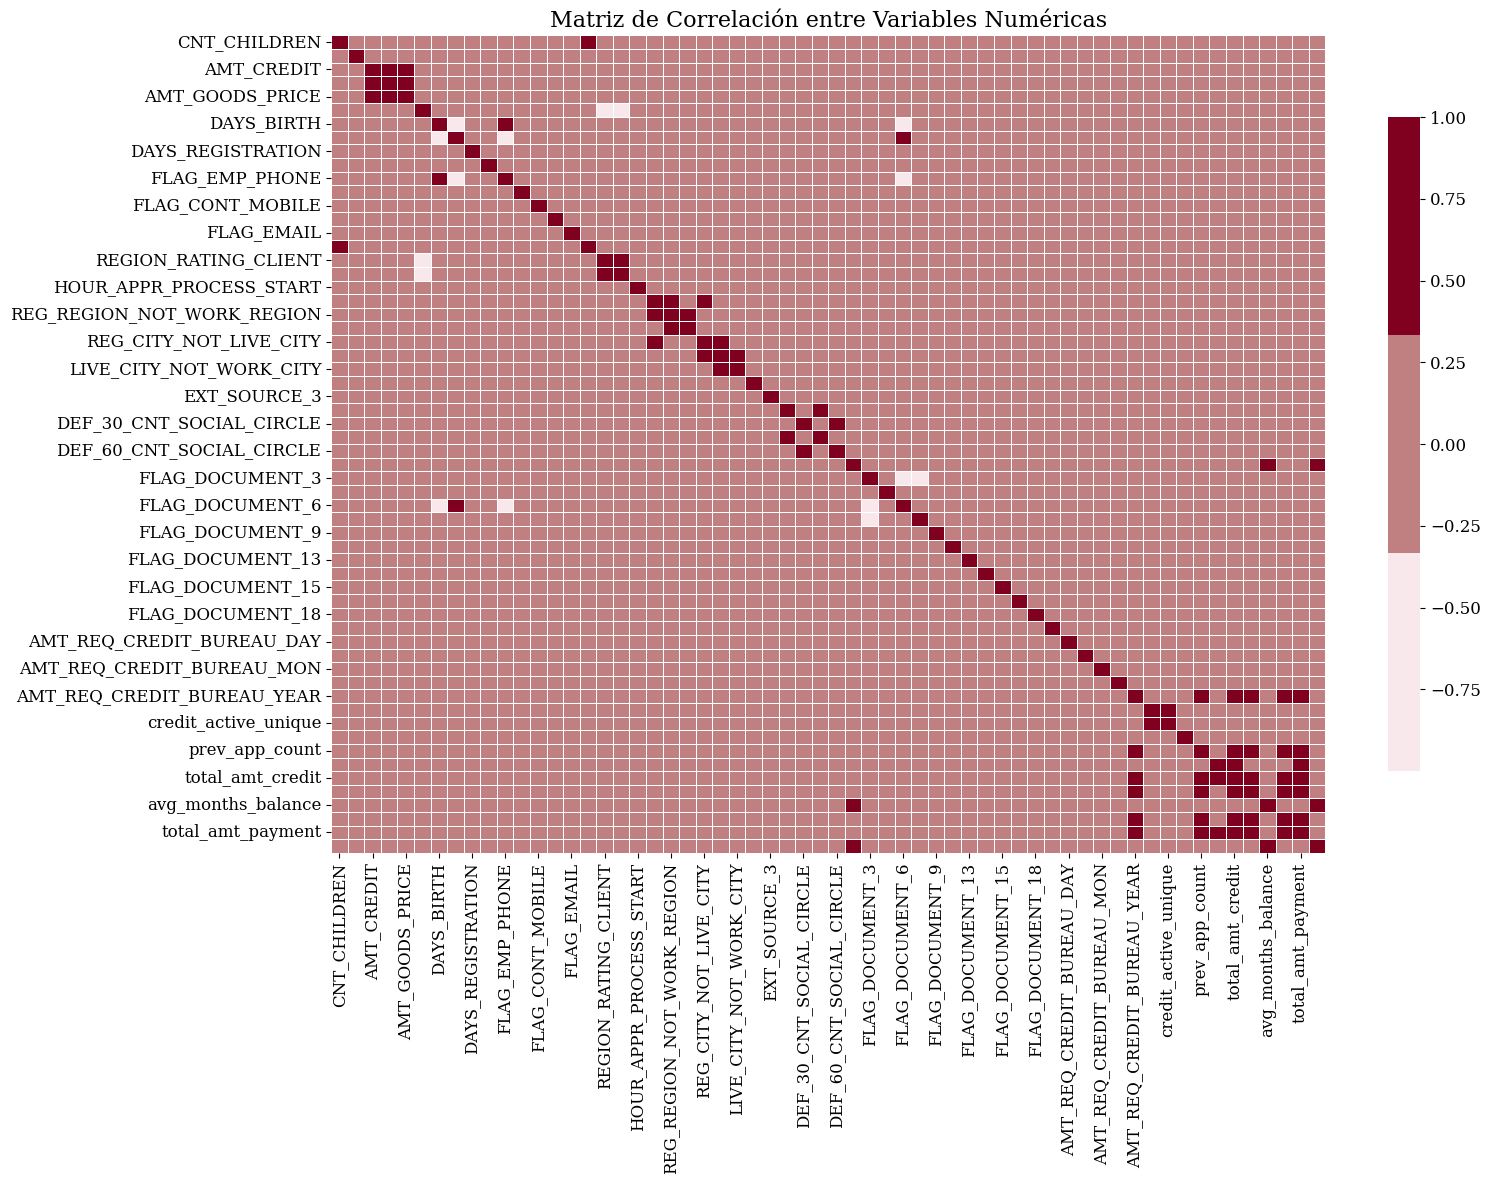

In [23]:
# 1. Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# 2. Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# 3. Definir paleta personalizada estilo vino pastel
cmap_vino_pastel = sns.color_palette(["#F8E8EC", "#C08081", "#800020"], as_cmap=True)

# 4. Visualizar con heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    matriz_correlacion,
    cmap=cmap_vino_pastel,
    annot=False,          # True si quieres ver los valores
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


In [24]:

# 1. Seleccionar solo variables numéricas (sin nulos)
df_numericas = df.select_dtypes(include=['int64', 'float64']).dropna()

# 2. Agregar constante para intercepto (requerido por VIF)
X = add_constant(df_numericas)

# 3. Calcular VIF para cada variable
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Ordenar por VIF descendente
vif_df = vif_df.sort_values("VIF", ascending=False)

# 5. Mostrar
print(vif_df)

                       Variable           VIF
0                         const  18677.595654
11               FLAG_EMP_PHONE   2485.373140
8                 DAYS_EMPLOYED   2465.928426
30     OBS_60_CNT_SOCIAL_CIRCLE    345.347579
28     OBS_30_CNT_SOCIAL_CIRCLE    344.817406
5               AMT_GOODS_PRICE     41.513172
3                    AMT_CREDIT     40.817717
17         REGION_RATING_CLIENT     11.016437
18  REGION_RATING_CLIENT_W_CITY     10.873466
21   REG_REGION_NOT_WORK_REGION      9.319682
24       REG_CITY_NOT_WORK_CITY      7.703256
22  LIVE_REGION_NOT_WORK_REGION      7.676728
60       avg_days_entry_payment      6.795705
57           avg_months_balance      6.730270
25      LIVE_CITY_NOT_WORK_CITY      6.235131
1                  CNT_CHILDREN      4.848335
16              CNT_FAM_MEMBERS      4.719836
55             total_amt_credit      4.387030
29     DEF_30_CNT_SOCIAL_CIRCLE      4.073873
53               prev_app_count      4.019722
31     DEF_60_CNT_SOCIAL_CIRCLE   

In [25]:
# 6. Identificar variables con VIF mayor a 10
variables_a_eliminar = vif_df[vif_df["VIF"] > 10]["Variable"].tolist()

# 7. Eliminar 'const' si está incluida (no es una variable del dataset original)
variables_a_eliminar = [var for var in variables_a_eliminar if var != "const"]

# 8. Eliminar esas variables del DataFrame original
df = df.drop(columns=variables_a_eliminar, errors='ignore')

# 9. Mostrar resultado
print(f"Variables eliminadas por VIF > 10: {len(variables_a_eliminar)}")
print(variables_a_eliminar)
print(f"Nuevas dimensiones del df: {df.shape}")

# df[df_numericas.columns] = df_numericas  # Si deseas mantenerlo en df


Variables eliminadas por VIF > 10: 8
['FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
Nuevas dimensiones del df: (307511, 65)


### 2.3.6. Variables con muy baja frecuencia de una clase (para categóricas o dummies)

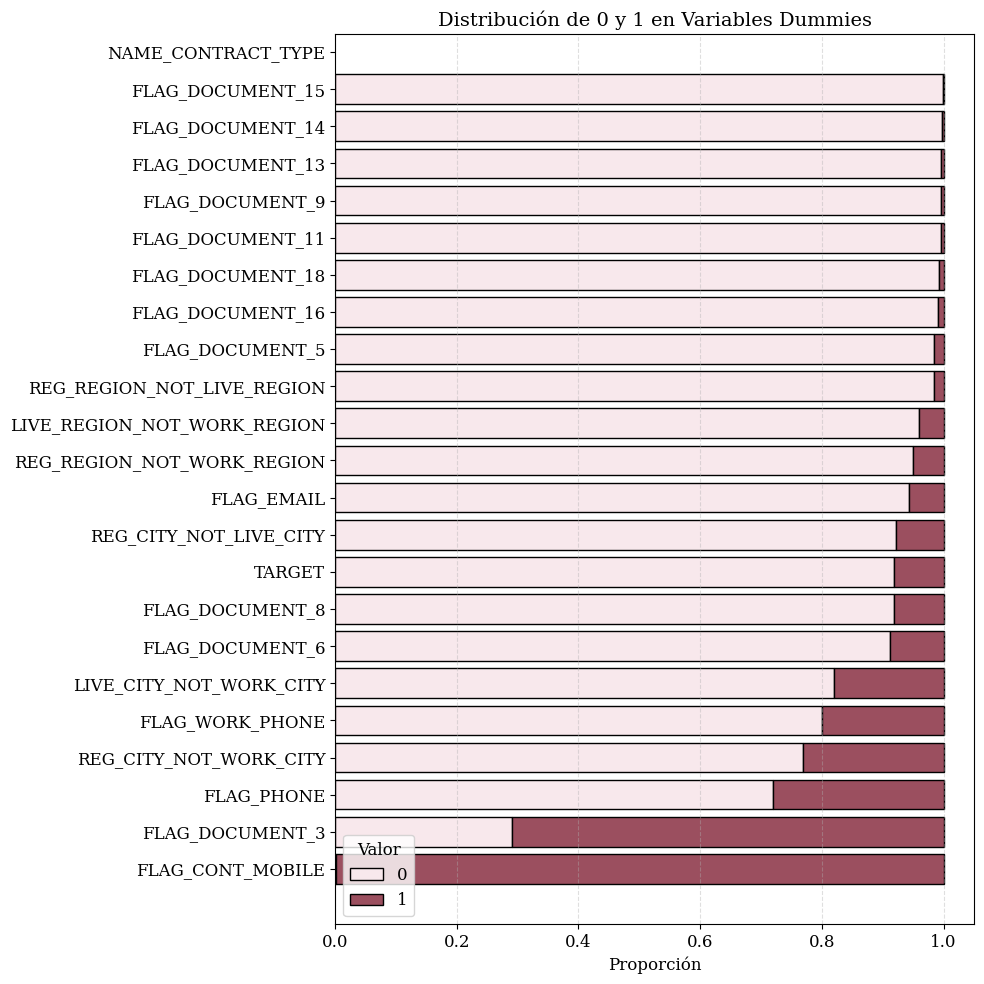

In [26]:
# 1. Seleccionar columnas binarias
dummies_binarias = [col for col in df.columns if df[col].nunique() == 2]
df_binarias = df[dummies_binarias].copy()

# 2. Convertir 'Sí'/'No' a 0/1 si es necesario
for col in df_binarias.columns:
    if df_binarias[col].dtype == object:
        df_binarias[col] = df_binarias[col].map({'No': 0, 'Sí': 1})

# 3. Calcular proporciones
proporciones = pd.DataFrame({
    '0': (df_binarias == 0).sum() / df_binarias.notna().sum(),
    '1': (df_binarias == 1).sum() / df_binarias.notna().sum()
})

# 4. Ordenar (opcional)
proporciones = proporciones.sort_values(by='1', ascending=False)

# 5. Ajustar altura dinámicamente
n = len(proporciones)
altura_figura = max(6, n * 0.4)  # altura base + 0.4 por variable

# 6. Graficar
plt.figure(figsize=(10, altura_figura))

plt.barh(proporciones.index, proporciones['0'], color="#F8E8EC", edgecolor='black', label='0')
plt.barh(proporciones.index, proporciones['1'], left=proporciones['0'], color="#9B4F5F", edgecolor='black', label='1')

plt.xlabel("Proporción")
plt.title("Distribución de 0 y 1 en Variables Dummies", fontsize=14)
plt.legend(title="Valor")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Se eliminaron 11 columnas por desbalance (<1%):
['FLAG_CONT_MOBILE', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15']


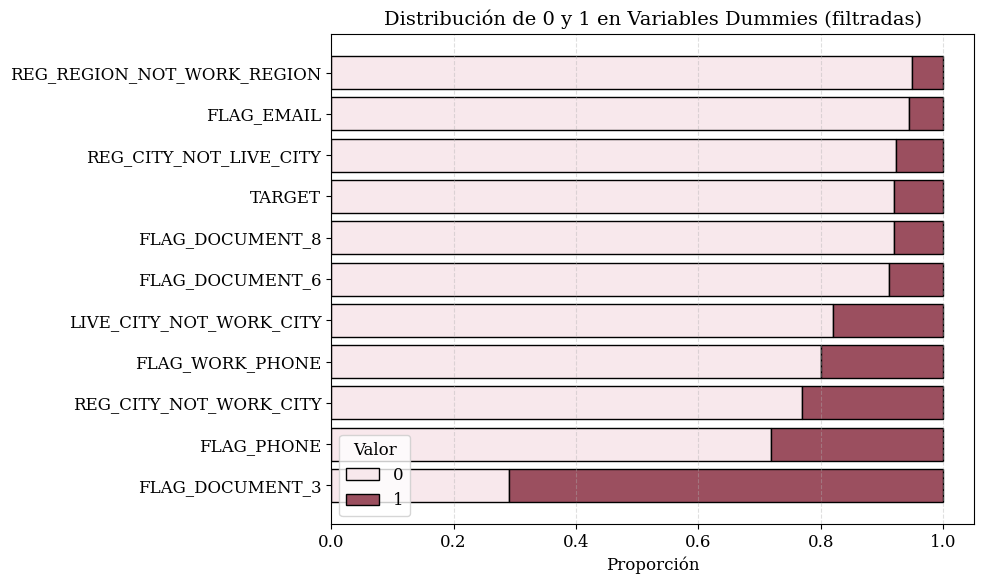

In [27]:
# 4. Eliminar columnas desbalanceadas (<5% en una de las clases)
columnas_desequilibradas = proporciones[(proporciones['0'] < 0.05) | (proporciones['1'] < 0.05)].index.tolist()
print(f"Se eliminaron {len(columnas_desequilibradas)} columnas por desbalance (<1%):\n{columnas_desequilibradas}")

# 5. Eliminar del DataFrame original
df = df.drop(columns=columnas_desequilibradas)

# 6. Recalcular proporciones para las dummies restantes
proporciones_filtradas = proporciones.drop(index=columnas_desequilibradas)

# 7. Ajustar altura dinámicamente
n = len(proporciones_filtradas)
altura_figura = max(6, n * 0.4)

# 8. Graficar
plt.figure(figsize=(10, altura_figura))

plt.barh(proporciones_filtradas.index, proporciones_filtradas['0'], color="#F8E8EC", edgecolor='black', label='0')
plt.barh(proporciones_filtradas.index, proporciones_filtradas['1'], left=proporciones_filtradas['0'], color="#9B4F5F", edgecolor='black', label='1')

plt.xlabel("Proporción")
plt.title("Distribución de 0 y 1 en Variables Dummies (filtradas)", fontsize=14)
plt.legend(title="Valor")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 2.3.7. Eliminar NAs

In [28]:
# 1. Proporción de 0 y 1 en la variable TARGET antes de eliminar NAs
print("Proporción de TARGET antes de eliminar NAs:")
proporcion_target = df['TARGET'].value_counts(normalize=True)
print(proporcion_target)
print("\n")

# 2. Mostrar variables que tienen NAs
na_counts = df.isna().sum()
na_pct = 100 * na_counts / len(df)
# Filtrar solo las columnas que tienen al menos un NA
na_info = pd.DataFrame({'NA count': na_counts, 'NA (%)': na_pct})
na_info = na_info[na_info['NA count'] > 0]
print("Variables con NAs:")
print(na_info.sort_values(by='NA (%)', ascending=False))
print("\n")

# 3. Eliminar las filas que tengan NAs en cualquier columna
df = df.dropna()

# 4. Proporción de 0 y 1 en la variable TARGET después de eliminar NAs
print("Proporción de TARGET después de eliminar NAs:")
proporcion_target_clean = df['TARGET'].value_counts(normalize=True)
print(proporcion_target_clean)

Proporción de TARGET antes de eliminar NAs:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


Variables con NAs:
                            NA count     NA (%)
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
credit_active_unique           44020  14.314935
total_credit_sum               44020  14.314935
bureau_count                   44020  14.314935
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
avg_months_balance             18067   5.875237
pos_cash_count                 18067   5.875237
total_amt_credit               16454   5.350703
avg_amt_app                    16454   5.350703
prev_app_count                 16454   5.350703
avg_days_entry_payment         15876   5.162742
ins

## 2.4. Guardar Base de Datos Filtrada

In [29]:
# Guardar el dataset consolidado como CSV
df.to_csv('/content/credit_risk_filtrada.csv', index=False)
print("Archivo guardado exitosamente como 'credit_risk_filtrada.csv'")

Archivo guardado exitosamente como 'credit_risk_filtrada.csv'


# **3. Análisis Exploratorio de Datos (EDA)**

## 3.1. Cargar Base de Datos Filtrada

In [30]:
# Cargar el archivo consolidado desde la ruta
df = pd.read_csv('/content/credit_risk_filtrada.csv')

# Verificar que se cargó correctamente
print("Dataset cargado correctamente. Dimensiones:", df.shape)

Dataset cargado correctamente. Dimensiones: (157026, 54)


## 3.2. Glosario de Variables



- **TARGET**: Variable objetivo (1 = cliente con dificultad de pago, 0 = sin dificultad).
- **NAME_CONTRACT_TYPE**: Tipo de contrato del préstamo (efectivo o rotativo).
- **CODE_GENDER**: Género del cliente.
- **FLAG_OWN_CAR**: Indicador de si el cliente posee un automóvil.
- **FLAG_OWN_REALTY**: Indicador de si el cliente posee una casa o departamento.
- **CNT_CHILDREN**: Número de hijos reportados por el cliente.
- **AMT_INCOME_TOTAL**: Ingreso total declarado por el cliente.
- **AMT_CREDIT**: Monto total del crédito solicitado.
- **NAME_TYPE_SUITE**: Acompañantes del cliente al momento de la solicitud del crédito.
- **NAME_INCOME_TYPE**: Tipo de ingreso del cliente (asalariado, pensionado, etc.).
- **NAME_EDUCATION_TYPE**: Nivel educativo alcanzado por el cliente.
- **NAME_FAMILY_STATUS**: Estado civil del cliente.
- **NAME_HOUSING_TYPE**: Tipo de vivienda donde reside el cliente.
- **REGION_POPULATION_RELATIVE**: Población relativa de la región donde vive el cliente.
- **DAYS_BIRTH**: Edad del cliente en días (número negativo desde el día actual).
- **DAYS_EMPLOYED**: Días desde el último empleo.
- **DAYS_REGISTRATION**: Días desde que se registró el documento de identidad.
- **DAYS_ID_PUBLISH**: Días desde que se actualizó por última vez el documento.
- **FLAG_WORK_PHONE**: Indicador de si el cliente tiene teléfono del trabajo.
- **FLAG_PHONE**: Indicador de si el cliente tiene teléfono personal.
- **FLAG_EMAIL**: Indicador de si el cliente tiene correo electrónico.
- **OCCUPATION_TYPE**: Profesión u ocupación del cliente.
- **REGION_RATING_CLIENT**: Calificación de la región de residencia del cliente.
- **WEEKDAY_APPR_PROCESS_START**: Día de la semana en que se inició la solicitud.
- **HOUR_APPR_PROCESS_START**: Hora del día en que se inició la solicitud.
- **REG_REGION_NOT_LIVE_REGION**: Vive fuera de la región donde se registró.
- **REG_REGION_NOT_WORK_REGION**: Trabaja fuera de la región donde se registró.
- **REG_CITY_NOT_LIVE_CITY**: Vive fuera de la ciudad donde se registró.
- **REG_CITY_NOT_WORK_CITY**: Trabaja fuera de la ciudad donde se registró.
- **ORGANIZATION_TYPE**: Tipo de organización empleadora del cliente.
- **EXT_SOURCE_2**: Score de riesgo proveniente de fuente externa 2.
- **EXT_SOURCE_3**: Score de riesgo proveniente de fuente externa 3.
- **OBS_30_CNT_SOCIAL_CIRCLE**: Observaciones en círculo social (últimos 30 días).
- **DEF_30_CNT_SOCIAL_CIRCLE**: Incumplimientos en círculo social (últimos 30 días).
- **DAYS_LAST_PHONE_CHANGE**: Días desde el último cambio de número telefónico.
- **FLAG_DOCUMENT_3, 5, 6, 8**: Documentos entregados (número correspondiente).
- **AMT_REQ_CREDIT_BUREAU_*:** Cantidad de consultas al buró de crédito en diferentes períodos (hora, día, semana, mes, trimestre, año).
- **bureau_count**: Número de entradas del cliente en buró de crédito.
- **credit_active_unique**: Número de tipos únicos de crédito activos.
- **total_credit_sum**: Suma total del crédito otorgado en el buró.
- **prev_app_count**: Número de solicitudes anteriores de crédito.
- **avg_amt_app**: Monto promedio de solicitudes previas.
- **total_amt_credit**: Monto total de crédito otorgado en el pasado.
- **pos_cash_count**: Número de cuentas POS/CASH anteriores.
- **avg_months_balance**: Promedio de meses en balance de cuentas POS.
- **installments_count**: Número total de cuotas o pagos.
- **total_amt_payment**: Suma total de pagos realizados.
- **'CNT_FAM_MEMBERS'**: 'numero_miembros_familia'
- **'LIVE_CITY_NOT_WORK_CITY**': 'ciudad_residencia_distinta_trabajo',
- **'DEF_60_CNT_SOCIAL_CIRCLE'**: 'default_60_dias_circulo_social',
- **'avg_days_entry_payment'**: 'promedio_dias_entre_registro_y_pago'

## 3.3. Renombramiento de Variables

In [31]:
df = df.rename(columns={
    'TARGET': 'incumplimiento_credito',
    'NAME_CONTRACT_TYPE': 'tipo_contrato',
    'CODE_GENDER': 'genero',
    'FLAG_OWN_CAR': 'posee_auto',
    'FLAG_OWN_REALTY': 'posee_vivienda',
    'CNT_CHILDREN': 'numero_hijos',
    'AMT_INCOME_TOTAL': 'ingreso_total',
    'AMT_CREDIT': 'monto_credito',
    'AMT_ANNUITY': 'cuota_periodica',
    'NAME_TYPE_SUITE': 'acompanantes_solicitud',
    'NAME_INCOME_TYPE': 'tipo_ingreso',
    'NAME_EDUCATION_TYPE': 'nivel_educativo',
    'NAME_FAMILY_STATUS': 'estado_civil',
    'NAME_HOUSING_TYPE': 'tipo_vivienda',
    'REGION_POPULATION_RELATIVE': 'poblacion_relativa_region',
    'DAYS_BIRTH': 'dias_desde_nacimiento',
    'DAYS_EMPLOYED': 'dias_empleado',
    'DAYS_REGISTRATION': 'dias_desde_registro',
    'DAYS_ID_PUBLISH': 'dias_desde_emision_id',
    'FLAG_WORK_PHONE': 'telefono_trabajo',
    'FLAG_PHONE': 'telefono_personal',
    'FLAG_EMAIL': 'tiene_email',
    'OCCUPATION_TYPE': 'ocupacion',
    'REGION_RATING_CLIENT': 'calificacion_region_cliente',
    'WEEKDAY_APPR_PROCESS_START': 'dia_solicitud',
    'HOUR_APPR_PROCESS_START': 'hora_solicitud',
    'REG_REGION_NOT_LIVE_REGION': 'vive_fuera_region_registrada',
    'REG_REGION_NOT_WORK_REGION': 'trabaja_fuera_region_registrada',
    'REG_CITY_NOT_LIVE_CITY': 'vive_fuera_ciudad_registrada',
    'REG_CITY_NOT_WORK_CITY': 'trabaja_fuera_ciudad_registrada',
    'ORGANIZATION_TYPE': 'tipo_organizacion',
    'EXT_SOURCE_2': 'fuente_externa_2',
    'EXT_SOURCE_3': 'fuente_externa_3',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'obs_sociales_30_dias',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'incumplimientos_30_dias',
    'DAYS_LAST_PHONE_CHANGE': 'dias_ultimo_cambio_telefono',
    'FLAG_DOCUMENT_3': 'documento_3',
    'FLAG_DOCUMENT_5': 'documento_5',
    'FLAG_DOCUMENT_6': 'documento_6',
    'FLAG_DOCUMENT_8': 'documento_8',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'consultas_buro_hora',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'consultas_buro_dia',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'consultas_buro_semana',
    'AMT_REQ_CREDIT_BUREAU_MON': 'consultas_buro_mes',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'consultas_buro_trimestre',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'consultas_buro_anio',
    'bureau_count': 'entradas_buro',
    'credit_active_unique': 'tipos_credito_activo',
    'total_credit_sum': 'suma_total_credito',
    'prev_app_count': 'cantidad_solicitudes_previas',
    'avg_amt_app': 'monto_promedio_solicitudes',
    'total_amt_credit': 'monto_total_credito',
    'pos_cash_count': 'cuentas_pos_cash',
    'avg_months_balance': 'promedio_meses_saldo',
    'installments_count': 'total_cuotas',
    'total_amt_payment': 'total_pagado',
    'CNT_FAM_MEMBERS': 'numero_miembros_familia',
    'LIVE_CITY_NOT_WORK_CITY': 'ciudad_residencia_distinta_trabajo',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'default_60_dias_circulo_social',
    'avg_days_entry_payment': 'promedio_dias_entre_registro_y_pago'
})

## 3.4. Exploración Descriptiva de Variables Filtradas

In [32]:
def build_my_info_table(df):
    info = []

    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique(dropna=True)
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        # Agregar estadísticas solo si es numérica
        if pd.api.types.is_numeric_dtype(data):
            media = data.mean()
            std = data.std()
            minimo = data.min()
            maximo = data.max()
            q1 = data.quantile(0.25)
            mediana = data.median()
            q3 = data.quantile(0.75)
        else:
            media = std = minimo = maximo = q1 = mediana = q3 = None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
            'moda': moda,
            'moda (%)': round(moda_pct, 2) if moda_pct else None,
            'media': round(media, 2) if media is not None else None,
            'desv. estándar': round(std, 2) if std is not None else None,
            'mínimo': minimo,
            'Q1': q1,
            'mediana': mediana,
            'Q3': q3,
            'máximo': maximo
        })

    # Imprimir resumen general
    print(f"Dimensiones del DataFrame: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    num_con_nulos = sum([1 for col in df.columns if df[col].isnull().any()])
    print(f"Variables con al menos un valor nulo: {num_con_nulos}")

    return pd.DataFrame(info).sort_values(by='nulos (#)', ascending=False).reset_index(drop=True)

# Aplicar función y guardar resultado
tabla_variables = build_my_info_table(df)

# Mostrar tabla
tabla_variables.head()


Dimensiones del DataFrame: 157,026 filas x 54 columnas
Variables con al menos un valor nulo: 0


columna    dtype  nulos (#)  nulos (%)  nunique  \
0   incumplimiento_credito    int64          0        0.0        2   
1       consultas_buro_mes  float64          0        0.0       22   
2         fuente_externa_2  float64          0        0.0    86642   
3         fuente_externa_3  float64          0        0.0      794   
4  incumplimientos_30_dias  float64          0        0.0        9   

                                           unique      moda  moda (%)  media  \
0                                          [1, 0]         0     91.46   0.09   
1                        Más de 10 valores únicos       0.0     82.22   0.29   
2                        Más de 10 valores únicos  0.285898      0.25   0.52   
3                        Más de 10 valores únicos    0.7463      0.52   0.50   
4  [2.0, 0.0, 1.0, 3.0, 5.0, 4.0, 34.0, 6.0, 8.0]       0.0     88.57   0.14   

   desv. estándar    mínimo        Q1   mediana        Q3     máximo  
0            0.28  0.000000  0.000000  0.000000  0.000000   1.000000  
1            0.96  0.000000  0.000000  0.000000  0.000000  24.000000  
2            0.19  0.000005  0.403370  0.569466  0.663778   0.855000  
3            0.20  0.000527  0.357293  0.520898  0.657784   0.885488  
4            0.45  0.000000  0.000000  0.000000  0.000000  34.000000

## 3.5. Clasificación de Variables

In [33]:
# 1. Variables categóricas (object):
categoricas = df.select_dtypes(include='object').columns.tolist()

# 2. Dummies (int64 con solo 2 categorías):
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 3. Variables numéricas que no son dummies (int64 con más de 2 valores únicos o float64):
numericas = tabla_variables[
    (
        (tabla_variables['dtype'] == 'int64') & (tabla_variables['nunique'] > 2)
    ) | (
        tabla_variables['dtype'] == 'float64'
    )
]['columna'].tolist()

print(f"Categóricas ({len(categoricas)}):", categoricas)
print(f"Dummies ({len(dummies)}):", dummies)
print(f"Numéricas ({len(numericas)}):", numericas)

Categóricas (12): ['tipo_contrato', 'genero', 'posee_auto', 'posee_vivienda', 'acompanantes_solicitud', 'tipo_ingreso', 'nivel_educativo', 'estado_civil', 'tipo_vivienda', 'ocupacion', 'dia_solicitud', 'tipo_organizacion']
Dummies (11): ['incumplimiento_credito', 'documento_3', 'documento_6', 'documento_8', 'ciudad_residencia_distinta_trabajo', 'trabaja_fuera_ciudad_registrada', 'vive_fuera_ciudad_registrada', 'telefono_trabajo', 'telefono_personal', 'tiene_email', 'trabaja_fuera_region_registrada']
Numéricas (31): ['consultas_buro_mes', 'fuente_externa_2', 'fuente_externa_3', 'incumplimientos_30_dias', 'default_60_dias_circulo_social', 'dias_ultimo_cambio_telefono', 'consultas_buro_hora', 'consultas_buro_dia', 'consultas_buro_semana', 'consultas_buro_trimestre', 'consultas_buro_anio', 'entradas_buro', 'tipos_credito_activo', 'suma_total_credito', 'cantidad_solicitudes_previas', 'monto_promedio_solicitudes', 'monto_total_credito', 'cuentas_pos_cash', 'promedio_meses_saldo', 'total_cuot

## 3.6. Graficas y Transformaciones Variables Categóricas (Object)

### 3.6.1. Visualización de Variables Categóricas

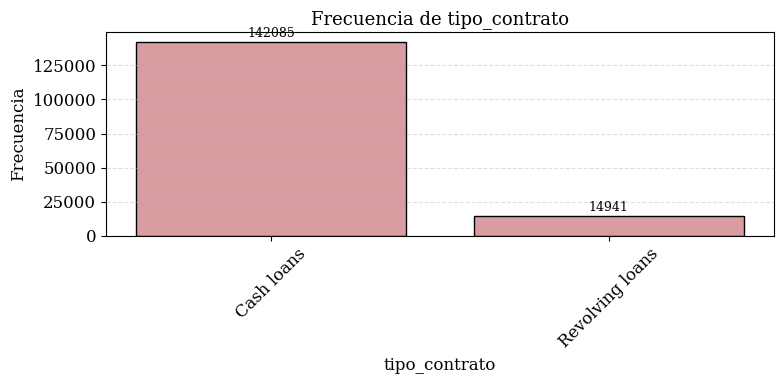

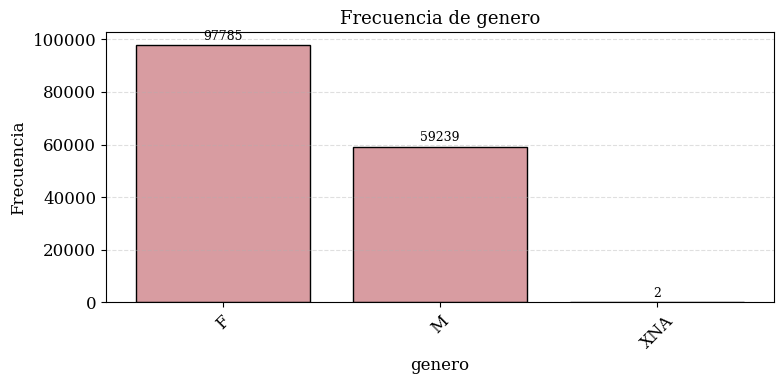

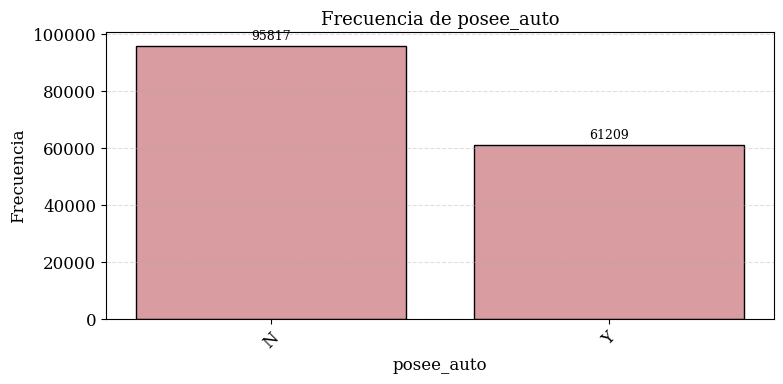

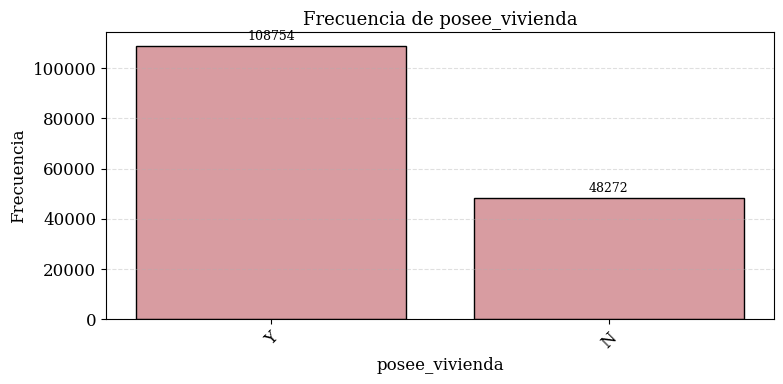

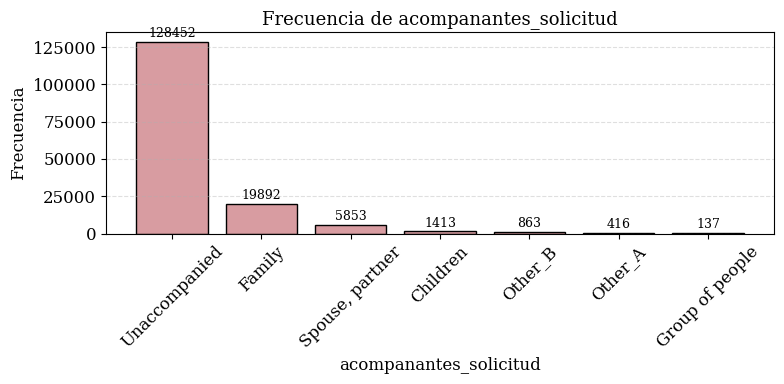

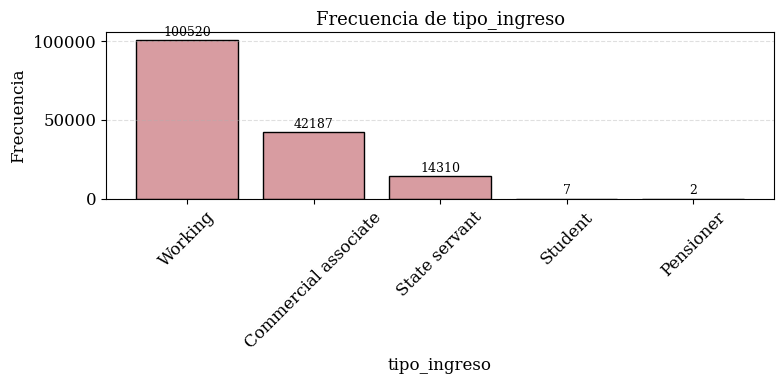

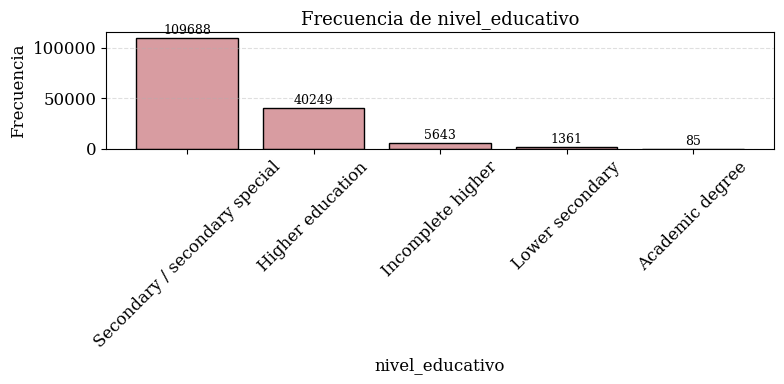

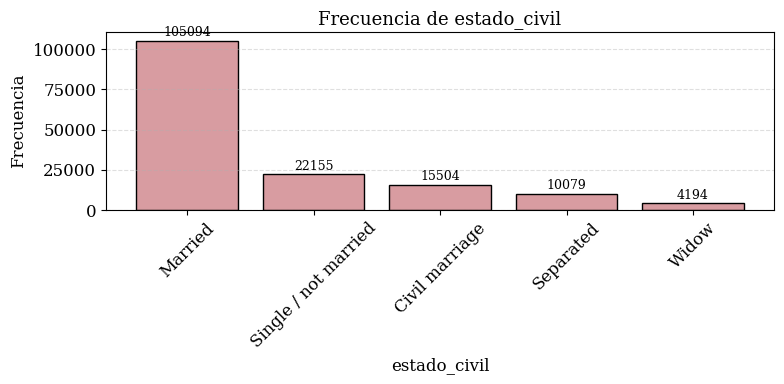

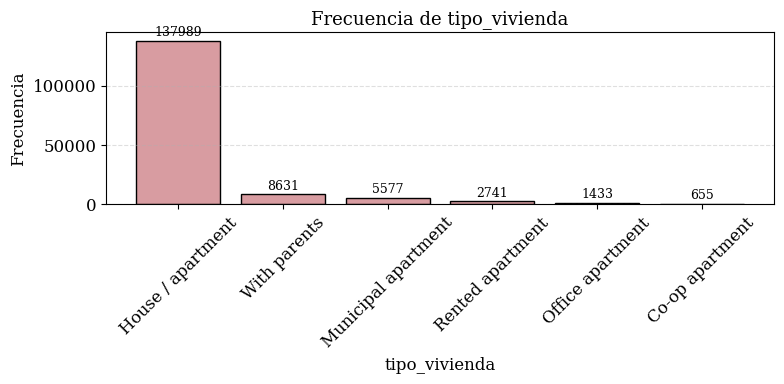

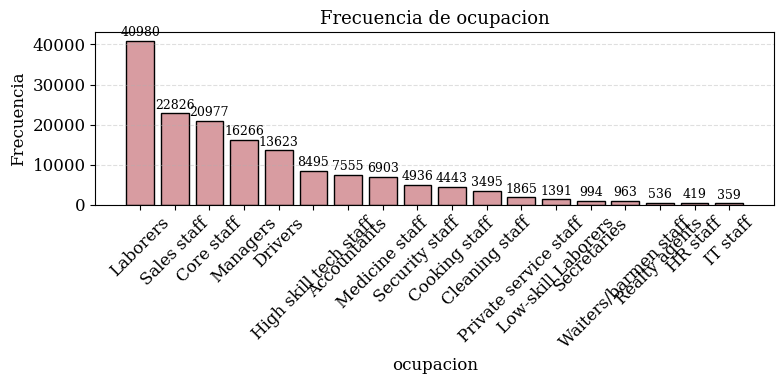

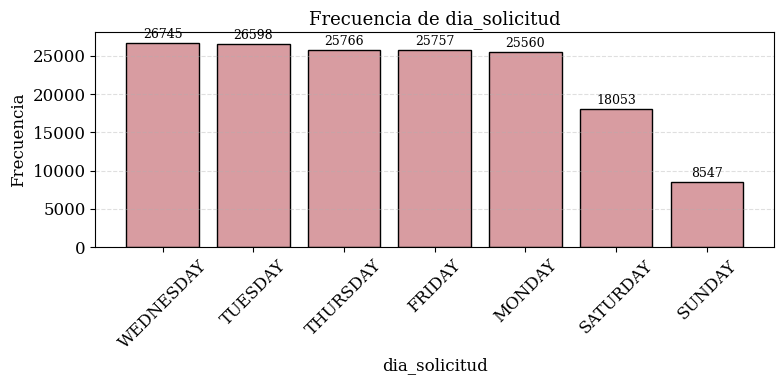

In [34]:
# 1. Seleccionar variables categóricas (object)
categoricas = df.select_dtypes(include='object').columns.tolist()

# 2. Generar gráfico de barras para cada variable categórica
for col in categoricas:
    if df[col].nunique() <= 30:
        plt.figure(figsize=(8, 4))
        valores = df[col].value_counts(dropna=False)
        plt.bar(valores.index.astype(str), valores.values, color='#d89ca1', edgecolor='black')
        plt.title(f"Frecuencia de {col}", fontsize=13)
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.4)

        # Mostrar valores sobre las barras
        for i, val in enumerate(valores.values):
            plt.text(i, val + max(valores)*0.01, str(val), ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()



### 3.6.2. Transformaciones en Variables Categóricas

In [35]:
# 1. tipo_contrato → Dummy con la categoría más frecuente como 1
df['tipo_contrato'] = (df['tipo_contrato'] == df['tipo_contrato'].mode()[0]).astype(int)

# 2. genero → Eliminar 'XNA' y dummy para la más frecuente
df = df[df['genero'] != 'XNA']
df['genero'] = (df['genero'] == df['genero'].mode()[0]).astype(int)

# 3. posee_auto → Dummy con la más frecuente como 1
df['posee_auto'] = (df['posee_auto'] == df['posee_auto'].mode()[0]).astype(int)

# 4. posee_vivienda → Dummy con la más frecuente como 1
df['posee_vivienda'] = (df['posee_vivienda'] == df['posee_vivienda'].mode()[0]).astype(int)

# 5. acompanantes_solicitud → Agrupar en "Other"
df['acompanantes_solicitud'] = df['acompanantes_solicitud'].replace({
    'Spouse, partner': 'Family',
    'Children': 'Other',
    'Other_B': 'Other',
    'Other_A': 'Other',
    'Group of people': 'Other'
})

# 6. tipo_ingreso → Agrupar en "Other"
df['tipo_ingreso'] = df['tipo_ingreso'].replace({
    'Unemployed': 'Other',
    'State servant': 'Other',
    'Student': 'Other',
    'Businessman': 'Other',
    'Pensioner': 'Other',
    'Maternity leave': 'Other'
})

# 7. nivel_educativo → Agrupar en "Other"
df['nivel_educativo'] = df['nivel_educativo'].replace({
    'Incomplete higher': 'Other',
    'Lower secondary': 'Other',
    'Academic degree': 'Other'
})

# 8. estado_civil → Eliminar categoría "Unknown"
df = df[df['estado_civil'] != 'Unknown']

# 9. ocupacion → Agrupar en "Other"
df['ocupacion'] = df['ocupacion'].replace({
    'Cooking staff': 'Other',
    'Cleaning staff': 'Other',
    'Private service staff': 'Other',
    'Low-skill Laborers': 'Other',
    'Secretaries': 'Other',
    'Waiters/barmen staff': 'Other',
    'Security staff': 'Other',
    'Realty agents': 'Other',
    'HR staff': 'Other',
    'IT staff': 'Other'
})

# 10. tipo_vivienda → Agrupar en "Other apartment"
df['tipo_vivienda'] = df['tipo_vivienda'].replace({
    'Municipal apartment': 'Other apartment',
    'Rented apartment': 'Other apartment',
    'Office apartment': 'Other apartment',
    'Co-op apartment': 'Other apartment'

})

mapeo_organizacion = {
    # Sector Privado Formal
    'Business Entity Type 1': 'Privado formal',
    'Business Entity Type 2': 'Privado formal',
    'Business Entity Type 3': 'Privado formal',
    'Self-employed': 'Privado formal',
    'Construction': 'Privado formal',
    'Hotel': 'Privado formal',
    'Restaurant': 'Privado formal',
    'Bank': 'Privado formal',
    'Telecom': 'Privado formal',
    'Electricity': 'Privado formal',
    'Postal': 'Privado formal',
    'Advertising': 'Privado formal',
    'Realtor': 'Privado formal',
    'Legal Services': 'Privado formal',
    'Mobile': 'Privado formal',

    # Sector Público / Gobierno
    'Government': 'Sector público',
    'School': 'Sector público',
    'Kindergarten': 'Sector público',
    'University': 'Sector público',
    'Police': 'Sector público',
    'Military': 'Sector público',
    'Security Ministries': 'Sector público',
    'Emergency': 'Sector público',

    # Salud y Educación (si quieres separar)
    'Medicine': 'Salud y educación',

    # Agricultura, Industria y Comercio
    'Agriculture': 'Agro-industria-comercio',
    'Housing': 'Agro-industria-comercio',
    'Industry: type 1': 'Agro-industria-comercio',
    'Industry: type 2': 'Agro-industria-comercio',
    'Industry: type 3': 'Agro-industria-comercio',
    'Industry: type 4': 'Agro-industria-comercio',
    'Industry: type 5': 'Agro-industria-comercio',
    'Industry: type 6': 'Agro-industria-comercio',
    'Industry: type 7': 'Agro-industria-comercio',
    'Industry: type 8': 'Agro-industria-comercio',
    'Industry: type 9': 'Agro-industria-comercio',
    'Industry: type 10': 'Agro-industria-comercio',
    'Industry: type 11': 'Agro-industria-comercio',
    'Industry: type 12': 'Agro-industria-comercio',
    'Industry: type 13': 'Agro-industria-comercio',
    'Trade: type 1': 'Agro-industria-comercio',
    'Trade: type 2': 'Agro-industria-comercio',
    'Trade: type 3': 'Agro-industria-comercio',
    'Trade: type 4': 'Agro-industria-comercio',
    'Trade: type 5': 'Agro-industria-comercio',
    'Trade: type 6': 'Agro-industria-comercio',
    'Trade: type 7': 'Agro-industria-comercio',

    # Servicios
    'Services': 'Servicios personales',
    'Cleaning': 'Servicios personales',
    'Insurance': 'Servicios personales',
    'Culture': 'Servicios personales',
    'Security': 'Servicios personales',
    'Religion': 'Servicios personales',

    # Otros
    'Other': 'Otro',
    'Transport: type 1': 'Otro',
    'Transport: type 2': 'Otro',
    'Transport: type 3': 'Otro',
    'Transport: type 4': 'Otro'
}

# Aplicar al DataFrame

df['tipo_organizacion'] = df['tipo_organizacion'].replace(mapeo_organizacion)

print("Transformaciones aplicadas directamente en df.")

Transformaciones aplicadas directamente en df.


### 3.6.3. Visualización de Variables Categóricas Modificadas

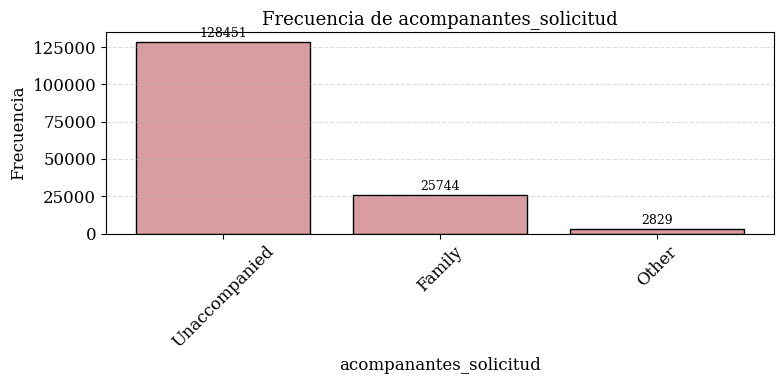

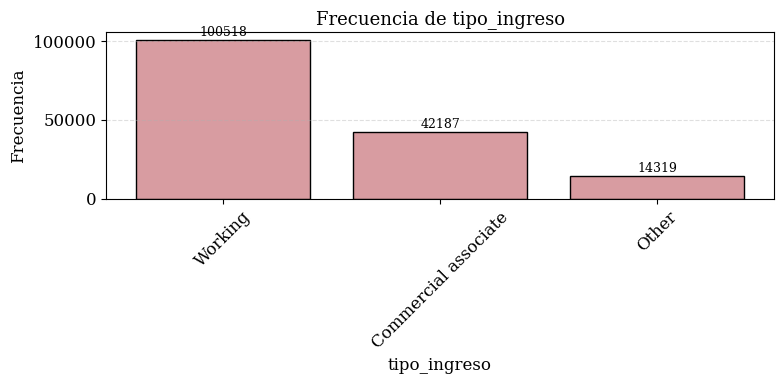

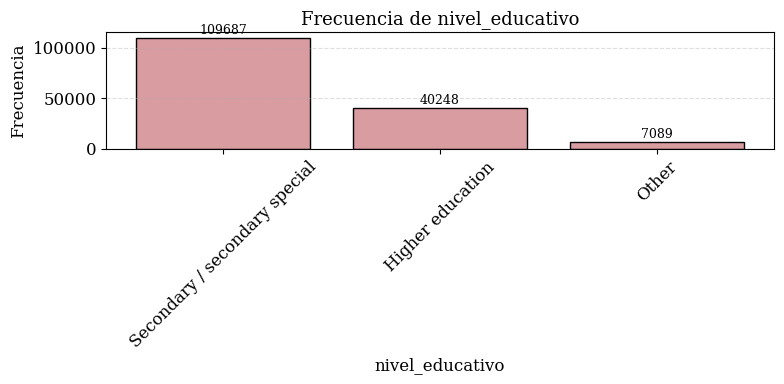

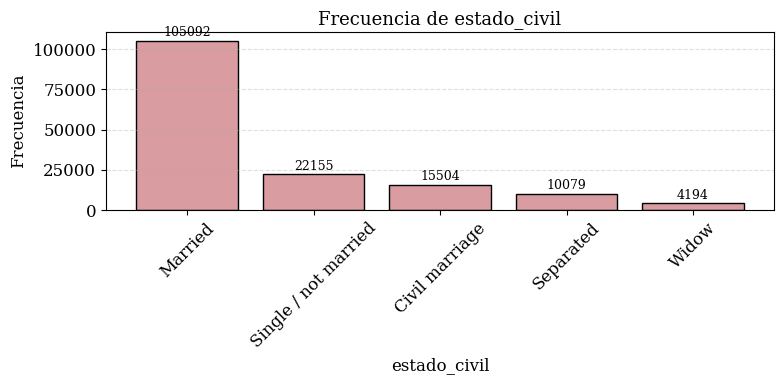

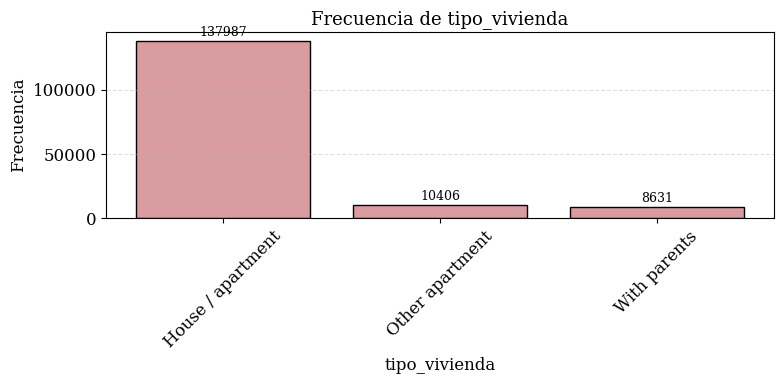

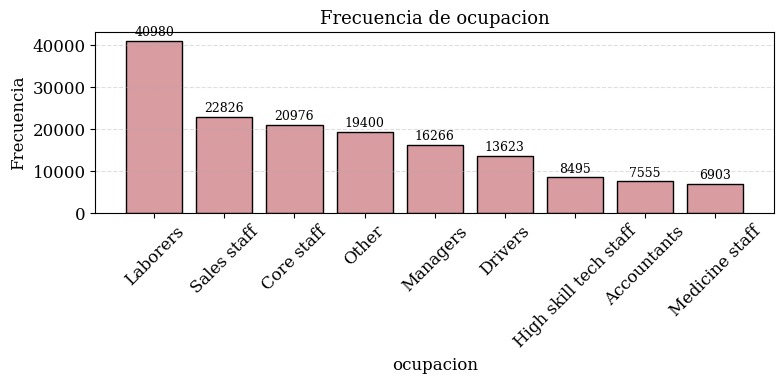

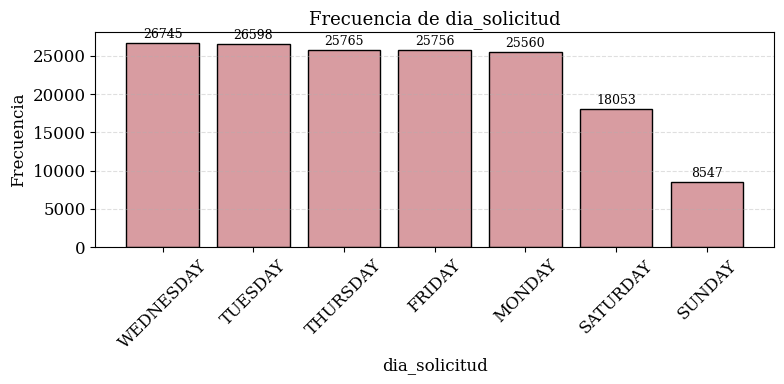

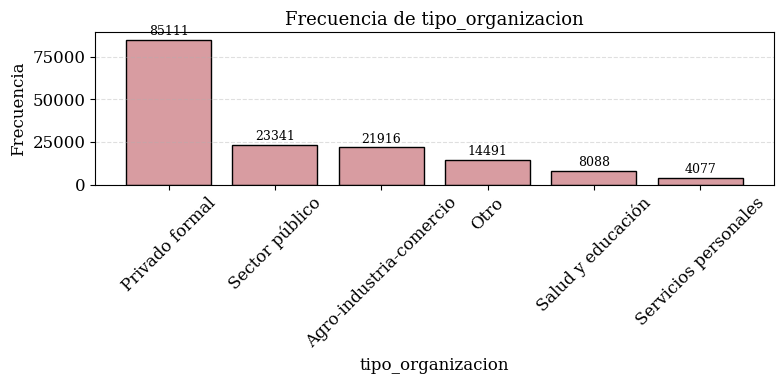

In [36]:
# 1. Seleccionar variables categóricas (object)
categoricas = df.select_dtypes(include='object').columns.tolist()

# 2. Generar gráfico de barras para cada variable categórica
for col in categoricas:
    if df[col].nunique() <= 30:
        plt.figure(figsize=(8, 4))
        valores = df[col].value_counts(dropna=False)
        plt.bar(valores.index.astype(str), valores.values, color='#d89ca1', edgecolor='black')
        plt.title(f"Frecuencia de {col}", fontsize=13)
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.4)

        # Mostrar valores sobre las barras
        for i, val in enumerate(valores.values):
            plt.text(i, val + max(valores)*0.01, str(val), ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()


### 3.6.4 Exploración Descriptiva de Variables Filtradas

In [37]:
def build_my_info_table(df):
    info = []

    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique(dropna=True)
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        # Agregar estadísticas solo si es numérica
        if pd.api.types.is_numeric_dtype(data):
            media = data.mean()
            std = data.std()
            minimo = data.min()
            maximo = data.max()
            q1 = data.quantile(0.25)
            mediana = data.median()
            q3 = data.quantile(0.75)
        else:
            media = std = minimo = maximo = q1 = mediana = q3 = None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
            'moda': moda,
            'moda (%)': round(moda_pct, 2) if moda_pct else None,
            'media': round(media, 2) if media is not None else None,
            'desv. estándar': round(std, 2) if std is not None else None,
            'mínimo': minimo,
            'Q1': q1,
            'mediana': mediana,
            'Q3': q3,
            'máximo': maximo
        })

    # Imprimir resumen general
    print(f"Dimensiones del DataFrame: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    num_con_nulos = sum([1 for col in df.columns if df[col].isnull().any()])
    print(f"Variables con al menos un valor nulo: {num_con_nulos}")

    return pd.DataFrame(info).sort_values(by='nulos (#)', ascending=False).reset_index(drop=True)

# Aplicar función y guardar resultado
tabla_variables = build_my_info_table(df)

# Mostrar tabla
tabla_variables.head()


Dimensiones del DataFrame: 157,024 filas x 54 columnas
Variables con al menos un valor nulo: 0


columna    dtype  nulos (#)  nulos (%)  nunique  \
0   incumplimiento_credito    int64          0        0.0        2   
1       consultas_buro_mes  float64          0        0.0       22   
2         fuente_externa_2  float64          0        0.0    86641   
3         fuente_externa_3  float64          0        0.0      794   
4  incumplimientos_30_dias  float64          0        0.0        9   

                                           unique      moda  moda (%)  media  \
0                                          [1, 0]         0     91.46   0.09   
1                        Más de 10 valores únicos       0.0     82.22   0.29   
2                        Más de 10 valores únicos  0.285898      0.25   0.52   
3                        Más de 10 valores únicos    0.7463      0.52   0.50   
4  [2.0, 0.0, 1.0, 3.0, 5.0, 4.0, 34.0, 6.0, 8.0]       0.0     88.57   0.14   

   desv. estándar    mínimo        Q1   mediana        Q3     máximo  
0            0.28  0.000000  0.000000  0.000000  0.000000   1.000000  
1            0.96  0.000000  0.000000  0.000000  0.000000  24.000000  
2            0.19  0.000005  0.403367  0.569466  0.663778   0.855000  
3            0.20  0.000527  0.357293  0.520898  0.657784   0.885488  
4            0.45  0.000000  0.000000  0.000000  0.000000  34.000000

### 3.6.5. Clasificación de Variables

In [38]:
# Clasificación de variables para el df transformado

# 1. Variables categóricas (tipo object)
categoricas = df.select_dtypes(include='object').columns.tolist()

# 2. Dummies: tipo int64 con solo 2 valores únicos
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 3. Variables numéricas reales (más de 2 valores únicos o tipo float64)
numericas = tabla_variables[
    (
        (tabla_variables['dtype'] == 'int64') & (tabla_variables['nunique'] > 2)
    ) | (
        tabla_variables['dtype'] == 'float64'
    )
]['columna'].tolist()

# Mostrar resultados
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")
print(f"Variables dummies ({len(dummies)}): {dummies}")
print(f"Variables numéricas ({len(numericas)}): {numericas}")

# Mostrar shape final
print(f"Shape del DataFrame: {df.shape}")

Variables categóricas (8): ['acompanantes_solicitud', 'tipo_ingreso', 'nivel_educativo', 'estado_civil', 'tipo_vivienda', 'ocupacion', 'dia_solicitud', 'tipo_organizacion']
Variables dummies (11): ['incumplimiento_credito', 'documento_3', 'documento_6', 'documento_8', 'ciudad_residencia_distinta_trabajo', 'trabaja_fuera_ciudad_registrada', 'vive_fuera_ciudad_registrada', 'telefono_trabajo', 'telefono_personal', 'tiene_email', 'trabaja_fuera_region_registrada']
Variables numéricas (31): ['consultas_buro_mes', 'fuente_externa_2', 'fuente_externa_3', 'incumplimientos_30_dias', 'default_60_dias_circulo_social', 'dias_ultimo_cambio_telefono', 'consultas_buro_hora', 'consultas_buro_dia', 'consultas_buro_semana', 'consultas_buro_trimestre', 'consultas_buro_anio', 'entradas_buro', 'tipos_credito_activo', 'suma_total_credito', 'cantidad_solicitudes_previas', 'monto_promedio_solicitudes', 'monto_total_credito', 'cuentas_pos_cash', 'promedio_meses_saldo', 'total_cuotas', 'total_pagado', 'numero_h

## 3.7. Graficas y Transformaciones de Variables Numéricas Diferentes a Dummies

### 3.7.1. Visualización de Variables Numéricas

 'consultas_buro_mes': 27,921 outliers detectados (fuera de [0.00, 0.00])


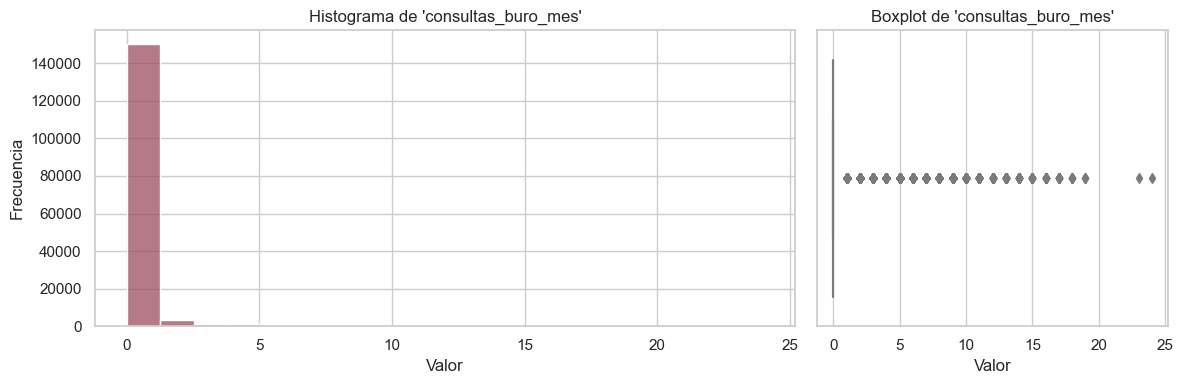

 'fuente_externa_2': 745 outliers detectados (fuera de [0.01, 1.05])


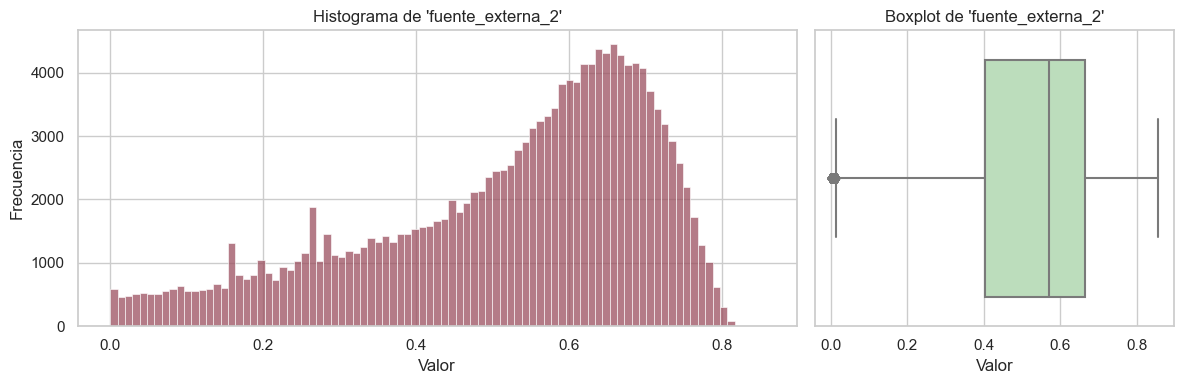

 'fuente_externa_3': 0 outliers detectados (fuera de [-0.09, 1.11])


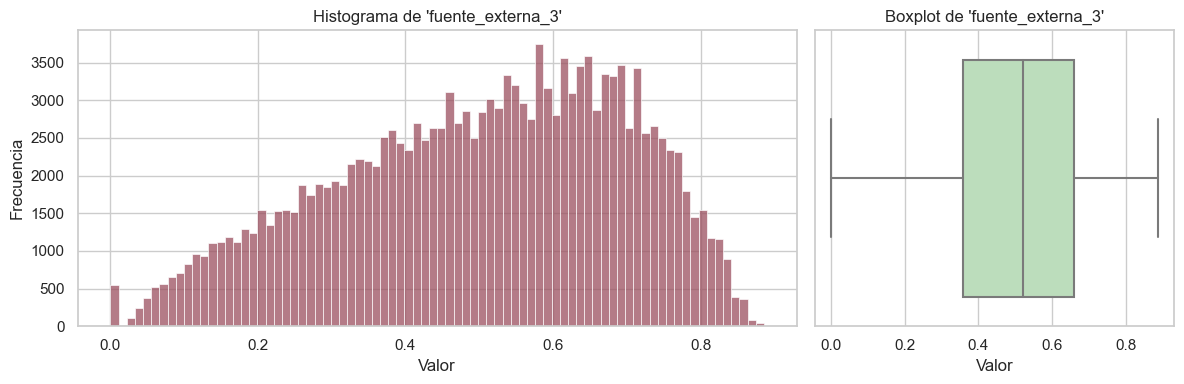

 'incumplimientos_30_dias': 17,940 outliers detectados (fuera de [0.00, 0.00])


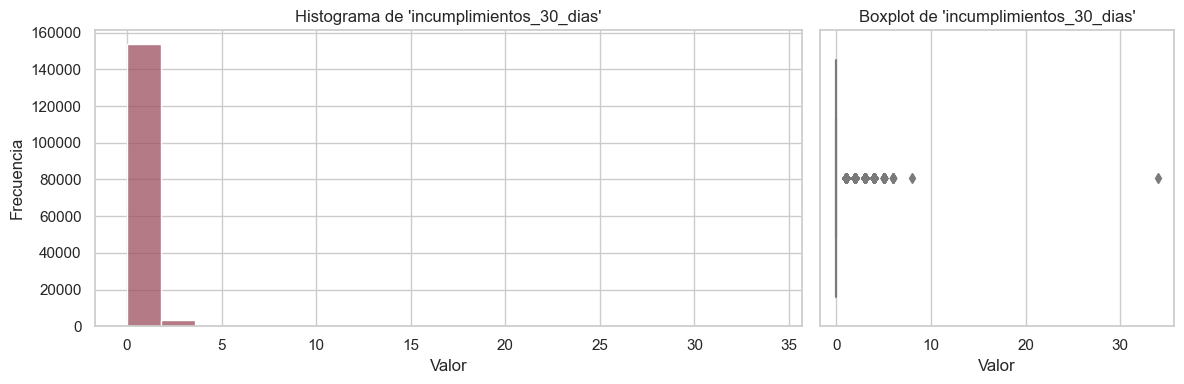

 'default_60_dias_circulo_social': 13,089 outliers detectados (fuera de [0.00, 0.00])


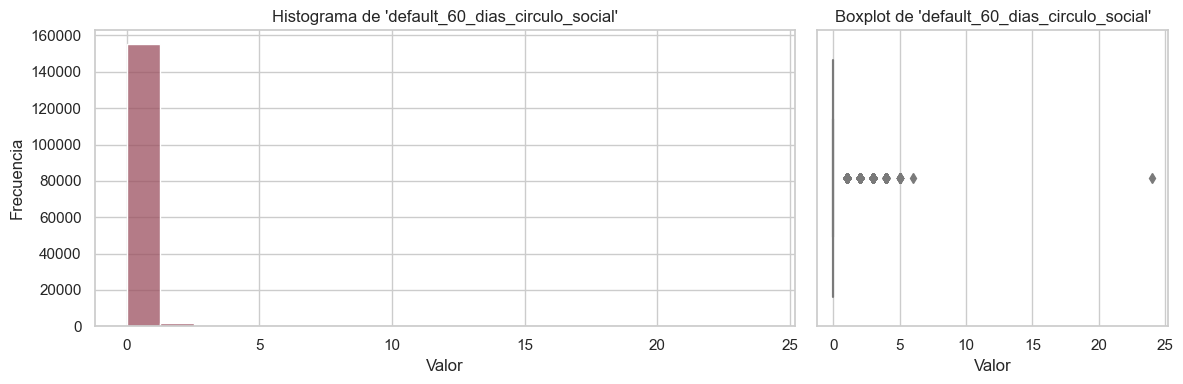

 'dias_ultimo_cambio_telefono': 103 outliers detectados (fuera de [-3589.50, 1574.50])


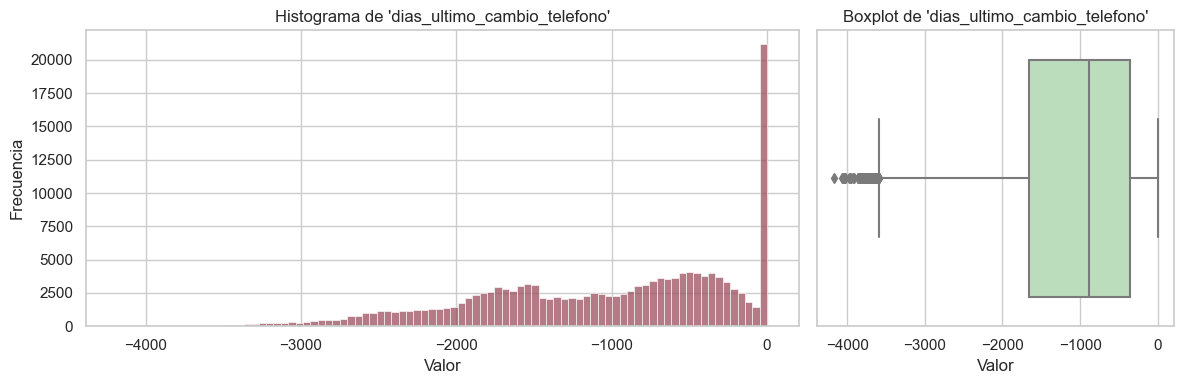

 'consultas_buro_hora': 969 outliers detectados (fuera de [0.00, 0.00])


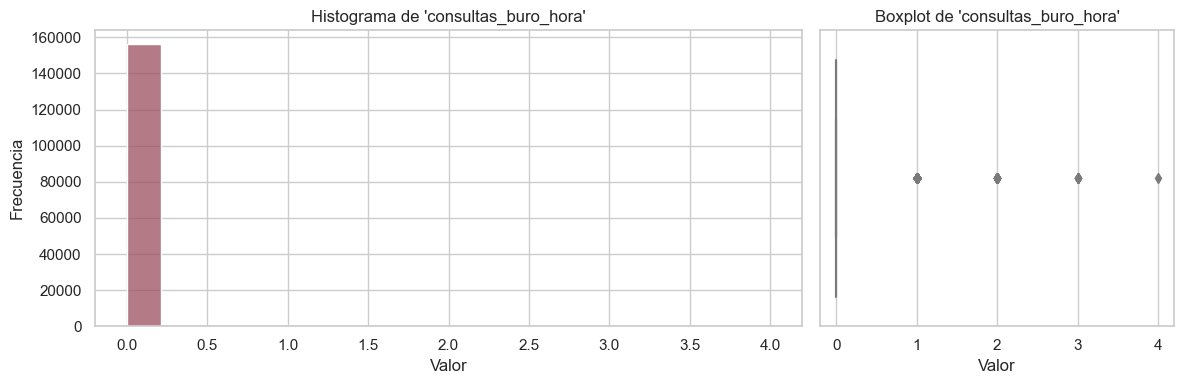

 'consultas_buro_dia': 820 outliers detectados (fuera de [0.00, 0.00])


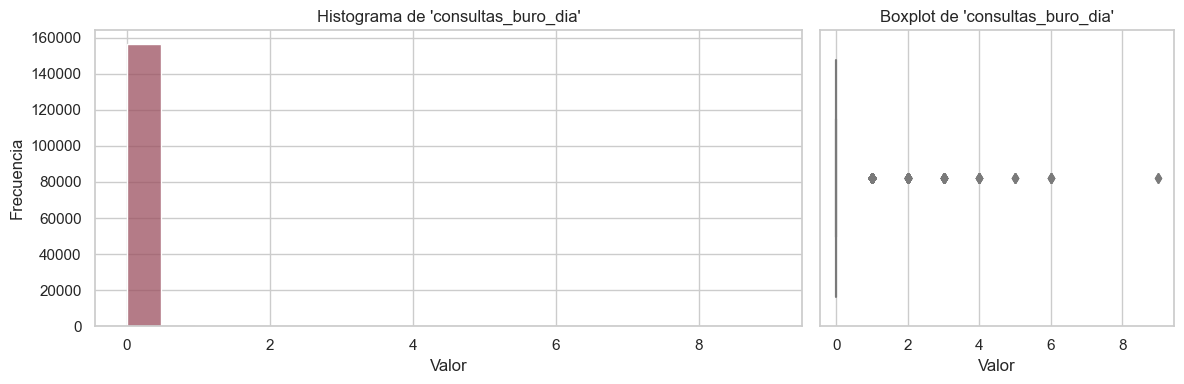

 'consultas_buro_semana': 5,230 outliers detectados (fuera de [0.00, 0.00])


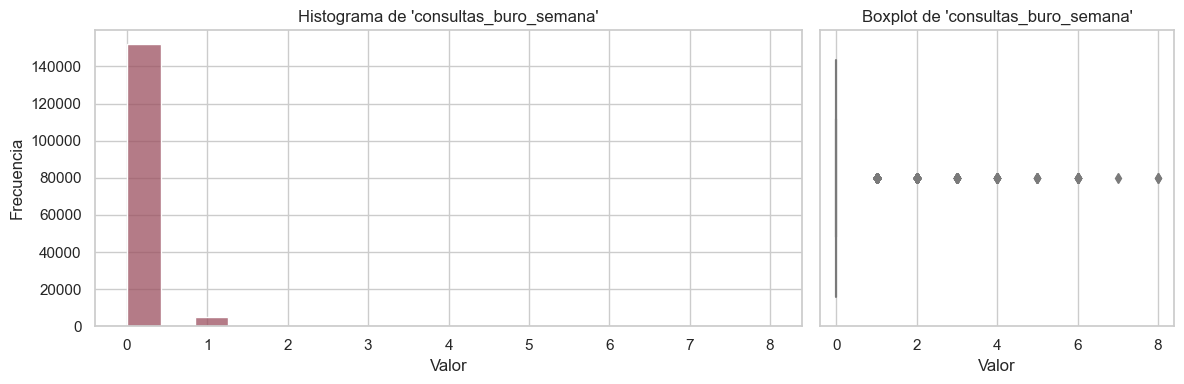

 'consultas_buro_trimestre': 30,436 outliers detectados (fuera de [0.00, 0.00])


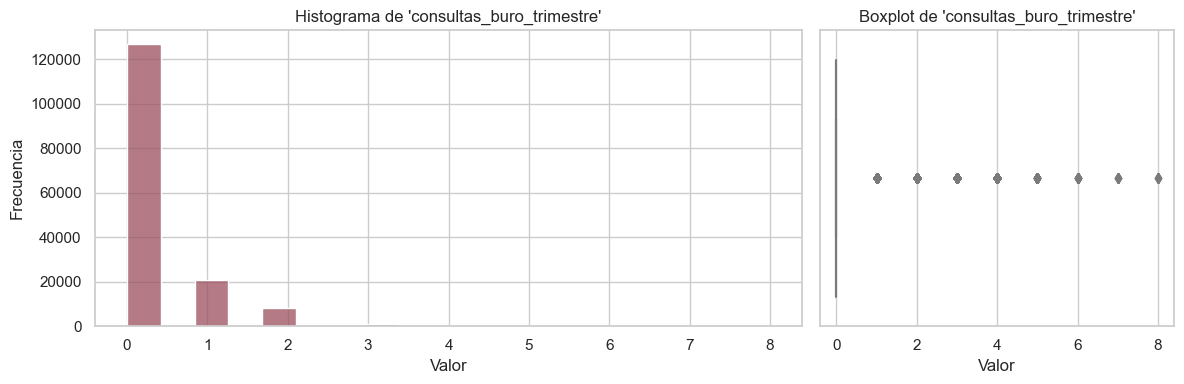

 'consultas_buro_anio': 3,925 outliers detectados (fuera de [-2.00, 6.00])


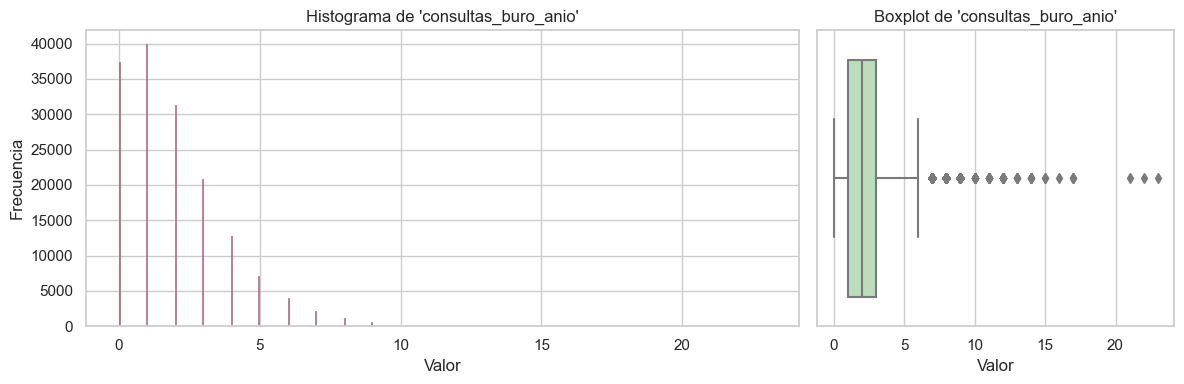

 'entradas_buro': 5,988 outliers detectados (fuera de [-4.50, 15.50])


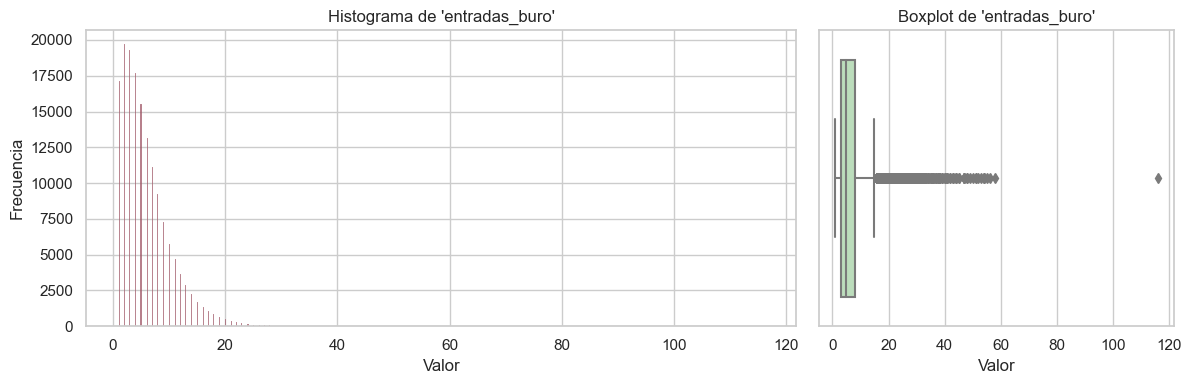

 'tipos_credito_activo': 1 outliers detectados (fuera de [-0.50, 3.50])


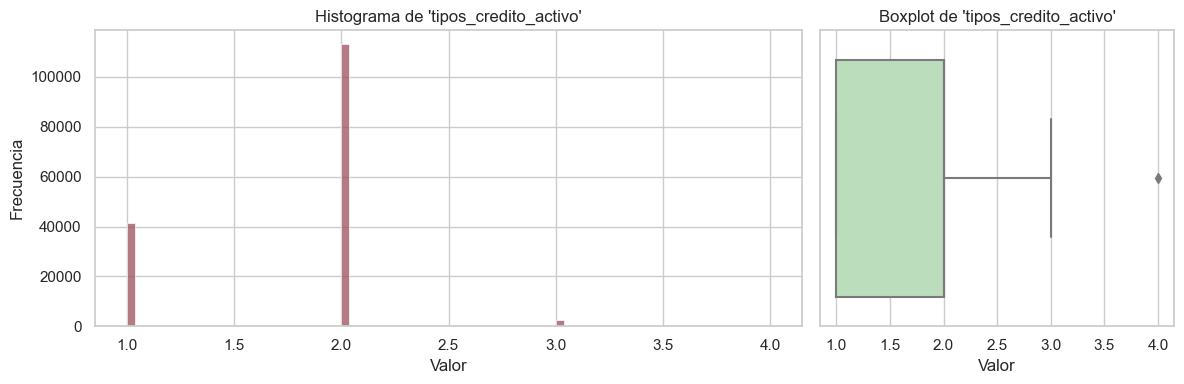

 'suma_total_credito': 12,452 outliers detectados (fuera de [-2941017.87, 5959406.40])


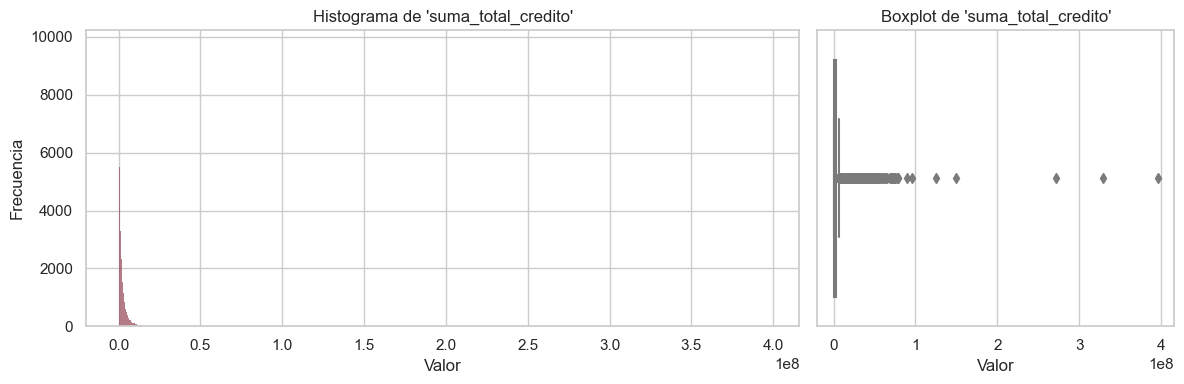

 'cantidad_solicitudes_previas': 5,140 outliers detectados (fuera de [-5.50, 14.50])


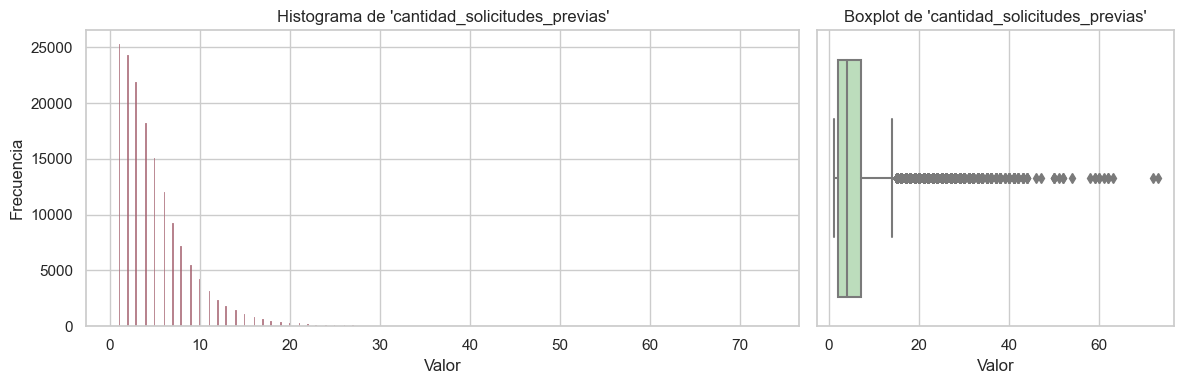

 'monto_promedio_solicitudes': 11,263 outliers detectados (fuera de [-134143.00, 386161.80])


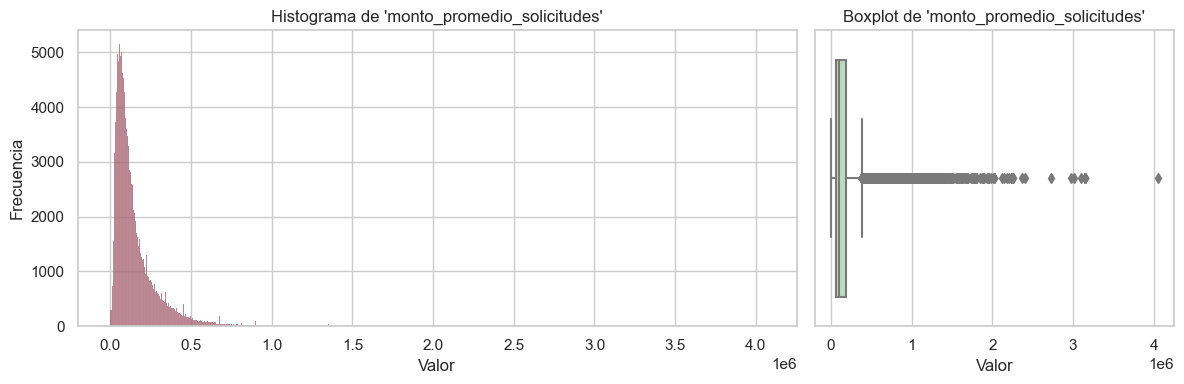

 'monto_total_credito': 12,867 outliers detectados (fuera de [-1385061.75, 2748629.25])


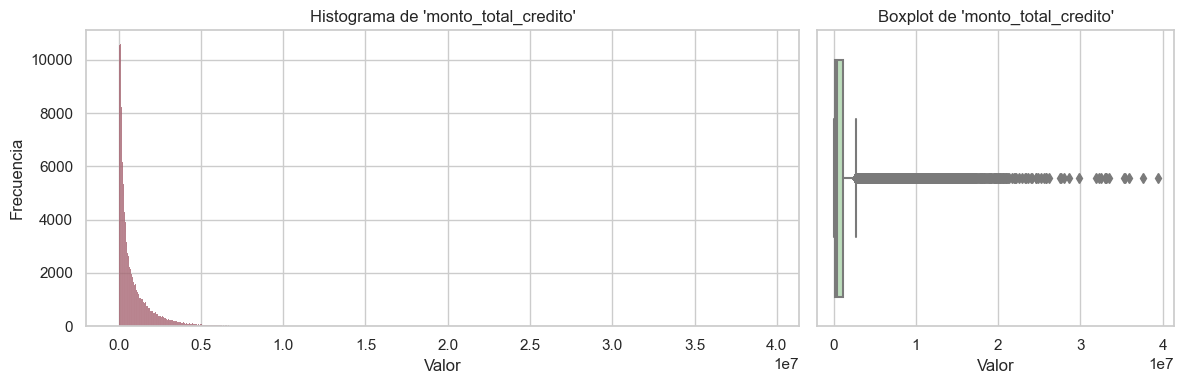

 'cuentas_pos_cash': 6,941 outliers detectados (fuera de [-28.50, 79.50])


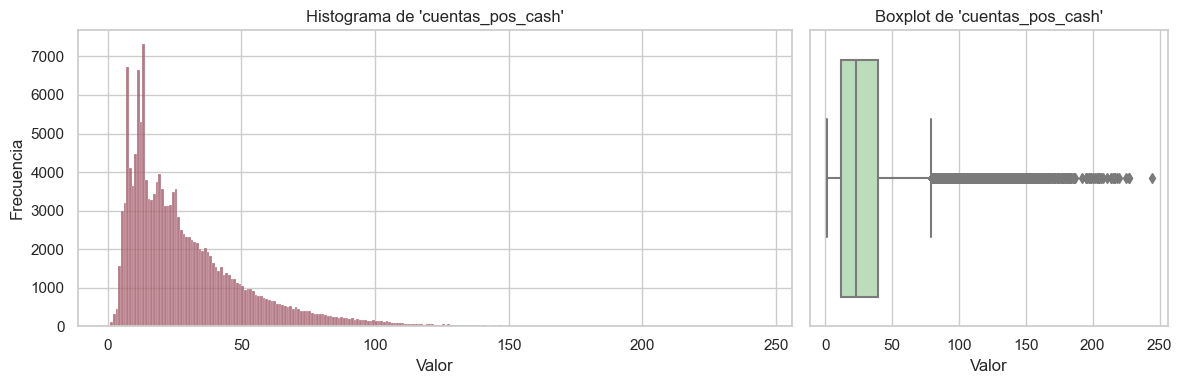

 'promedio_meses_saldo': 1,322 outliers detectados (fuera de [-87.41, 26.04])


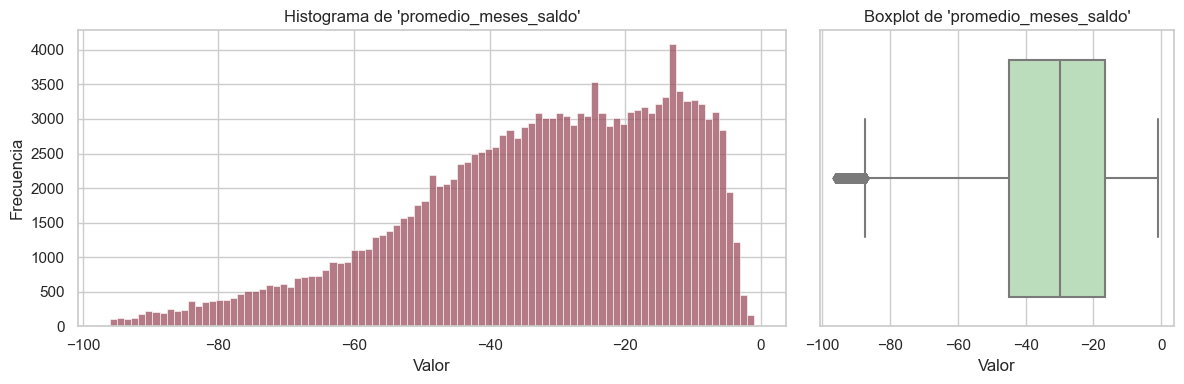

 'total_cuotas': 12,812 outliers detectados (fuera de [-46.50, 109.50])


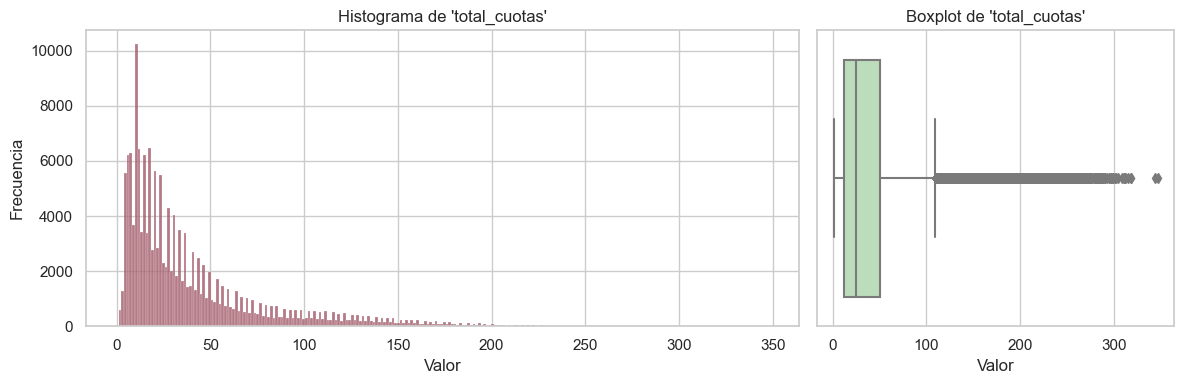

 'total_pagado': 14,556 outliers detectados (fuera de [-932532.94, 1916806.00])


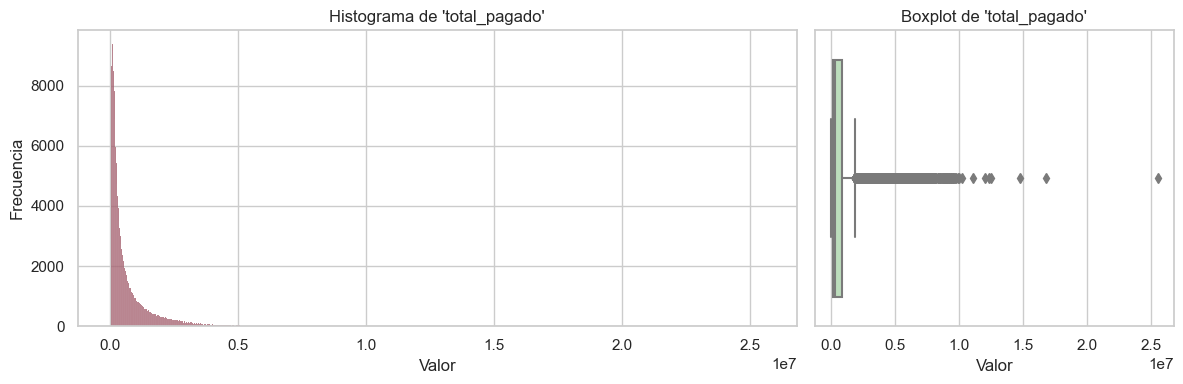

 'numero_hijos': 2,670 outliers detectados (fuera de [-1.50, 2.50])


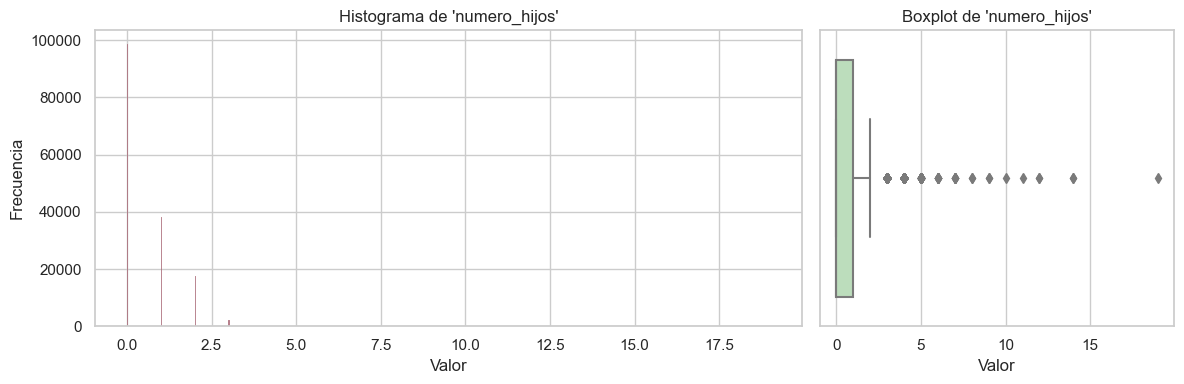

 'ingreso_total': 4,555 outliers detectados (fuera de [-49500.00, 382500.00])


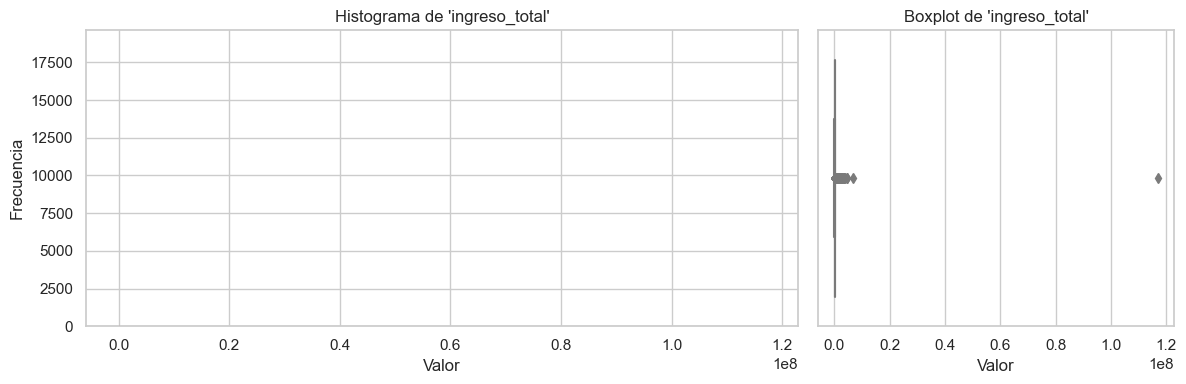

 'cuota_periodica': 2,751 outliers detectados (fuera de [-10237.50, 63238.50])


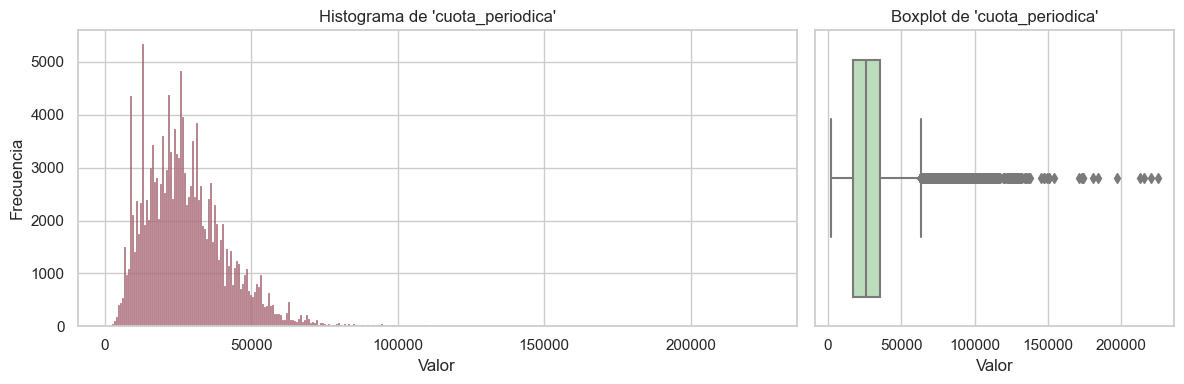

 'poblacion_relativa_region': 3,321 outliers detectados (fuera de [-0.02, 0.06])


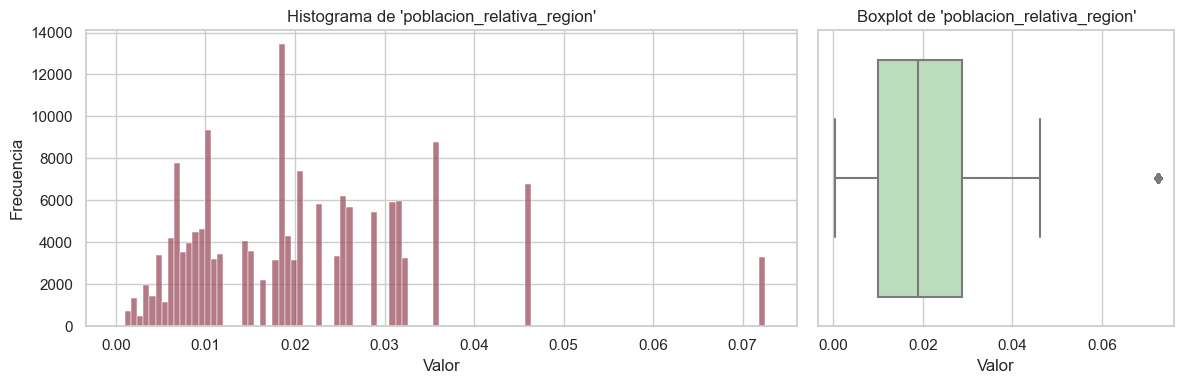

 'dias_desde_nacimiento': 0 outliers detectados (fuera de [-25991.38, -3574.38])


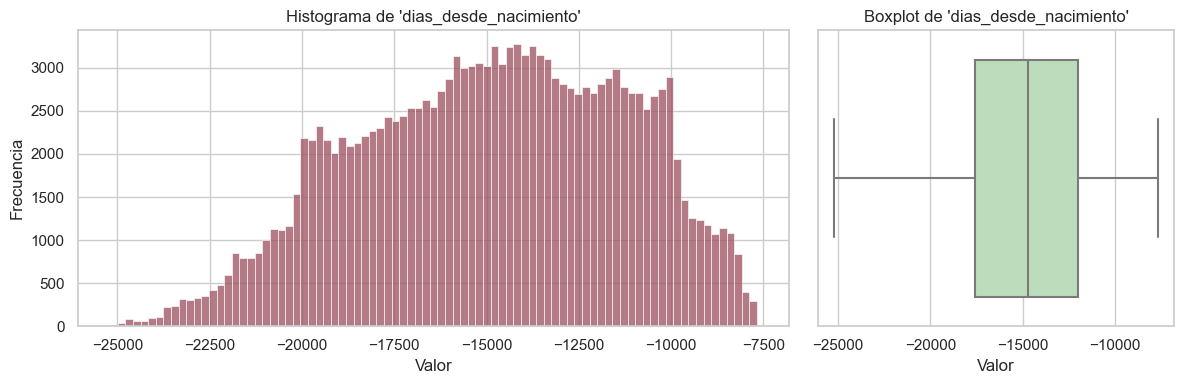

 'dias_desde_registro': 357 outliers detectados (fuera de [-14603.50, 5800.50])


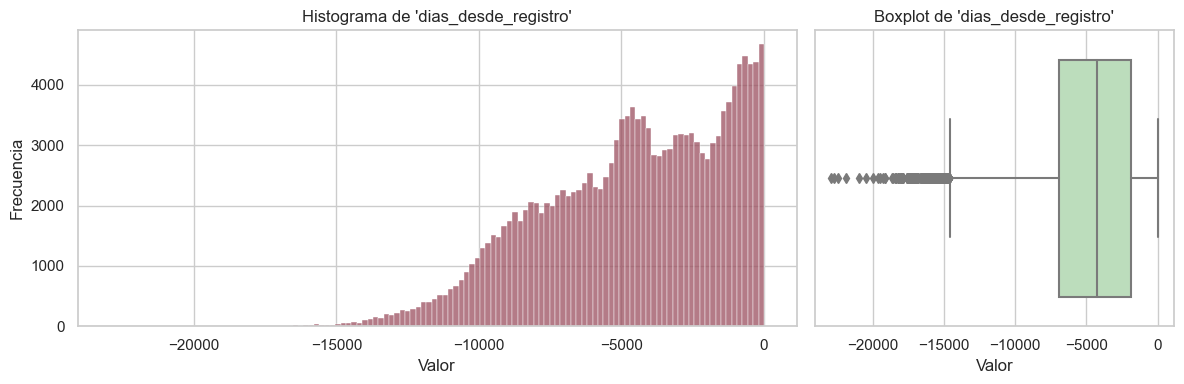

 'dias_desde_emision_id': 0 outliers detectados (fuera de [-8151.00, 2345.00])


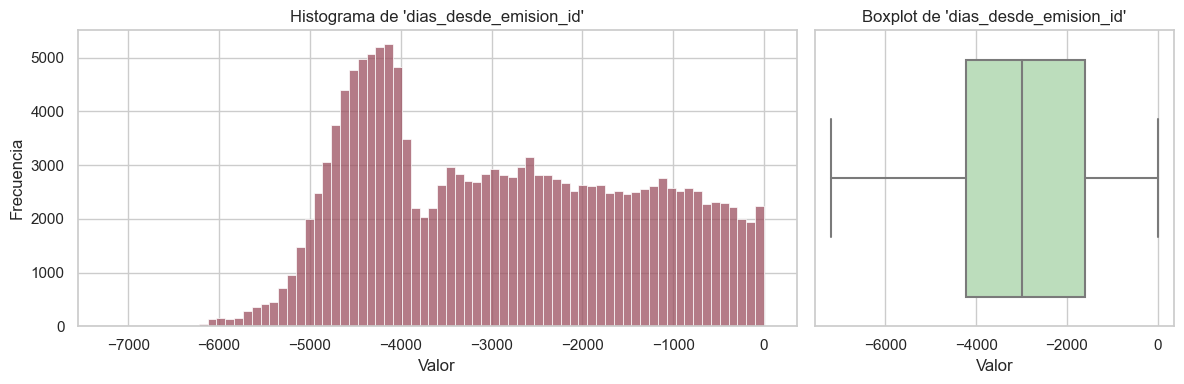

 'numero_miembros_familia': 2,528 outliers detectados (fuera de [0.50, 4.50])


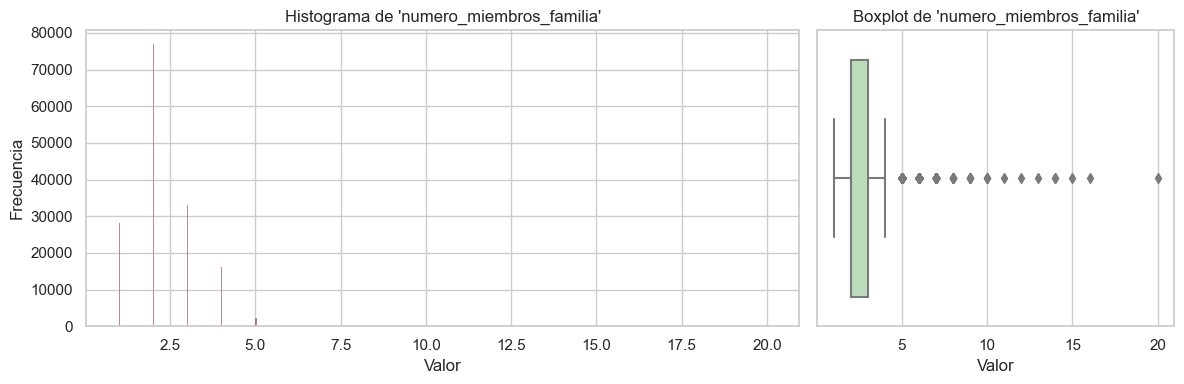

 'hora_solicitud': 244 outliers detectados (fuera de [2.50, 22.50])


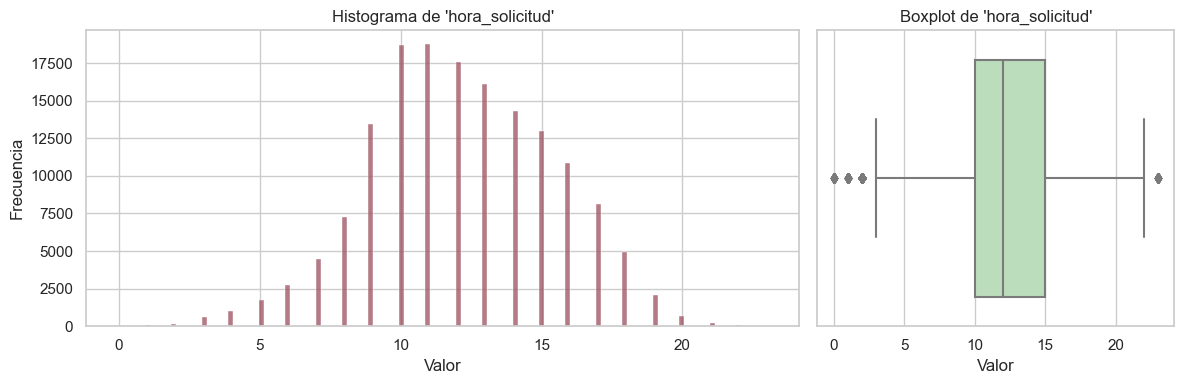

 'promedio_dias_entre_registro_y_pago': 857 outliers detectados (fuera de [-2630.25, 837.54])


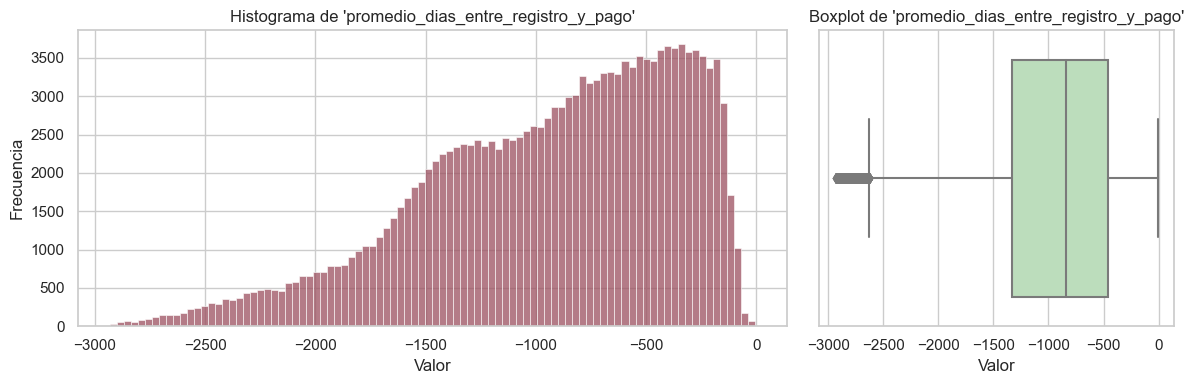

In [39]:
# Estilo gráfico
sns.set(style="whitegrid")

# Recorrer cada variable numérica
for col in numericas:
    if col in df.columns:
        # Calcular IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar outliers
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        num_outliers = outliers.shape[0]

        # Crear figura
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})

        # Histograma
        sns.histplot(data=df, x=col, ax=axes[0], color="#9B4F5F", kde=False)
        axes[0].set_title(f"Histograma de '{col}'", fontsize=12)
        axes[0].set_xlabel("Valor")
        axes[0].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[1], color="#b6e2b6")
        axes[1].set_title(f"Boxplot de '{col}'", fontsize=12)
        axes[1].set_xlabel("Valor")
        axes[1].set_yticks([])

        # Mostrar conteo de outliers en consola
        print(f" '{col}': {num_outliers:,} outliers detectados (fuera de [{limite_inferior:.2f}, {limite_superior:.2f}])")

        plt.tight_layout()
        plt.show()

### 3.7.2. Eliminar valores negativos

In [40]:
df = df[df['total_pagado'] >= 0]
df = df[df['total_cuotas'] >= 0]
df = df[df['cuentas_pos_cash'] >= 0]
df = df[df['monto_total_credito'] >= 0]

### 3.7.3. Log-Transformaciones de Variables

In [41]:
# Aplicar log1p a cada variable y reemplazar en el mismo df
df['ingreso_total'] = np.log1p(df['ingreso_total'])
df['cuota_periodica'] = np.log1p(df['cuota_periodica'])
df['consultas_buro_anio'] = np.log1p(df['consultas_buro_anio'])
df['entradas_buro'] = np.log1p(df['entradas_buro'])
df['total_pagado'] = np.log1p(df['total_pagado'])
df['total_cuotas'] = np.log1p(df['total_cuotas'])
df['cuentas_pos_cash'] = np.log1p(df['cuentas_pos_cash'])
df['monto_promedio_solicitudes'] = np.log1p(df['monto_promedio_solicitudes'])
df['cantidad_solicitudes_previas'] = np.log1p(df['cantidad_solicitudes_previas'])
df['suma_total_credito'] = np.log1p(df['suma_total_credito'])
df['monto_total_credito'] = np.log1p(df['monto_total_credito'])

print(" Transformación logarítmica aplicada a las siguientes variables: ingreso_total, cuota_periodica, consultas_buro_anio, entradas_buro, total_pagado, total_cuotas, cuentas_pos_cash, monto_promedio_solicitudes, cantidad_solicitudes_previas, suma_total_credito, monto_total_credito.")


 Transformación logarítmica aplicada a las siguientes variables: ingreso_total, cuota_periodica, consultas_buro_anio, entradas_buro, total_pagado, total_cuotas, cuentas_pos_cash, monto_promedio_solicitudes, cantidad_solicitudes_previas, suma_total_credito, monto_total_credito.


### 3.7.4. Binarizar Variables

In [42]:
# Binarizar variables
df['consultas_buro_hora'] = (df['consultas_buro_hora'] > 0).astype(int)
df['consultas_buro_dia'] = (df['consultas_buro_dia'] > 0).astype(int)
df['consultas_buro_semana'] = (df['consultas_buro_semana'] > 0).astype(int)
df['consultas_buro_mes'] = (df['consultas_buro_mes'] > 0).astype(int)
df['consultas_buro_trimestre'] = (df['consultas_buro_trimestre'] > 0).astype(int)
df['incumplimientos_30_dias'] = (df['incumplimientos_30_dias'] > 0).astype(int)
df['default_60_dias_circulo_social'] = (df['default_60_dias_circulo_social'] > 0).astype(int)
df['dias_ultimo_cambio_telefono'] = (df['dias_ultimo_cambio_telefono'] != 0).astype(int)

print(" Variables binarizadas y originales eliminadas correctamente.")

 Variables binarizadas y originales eliminadas correctamente.


### 3.7.5. Categorizar Variables

In [43]:
# 1. numero_hijos
df['numero_hijos'] = pd.cut(df['numero_hijos'],
                                bins=[-1, 0, 2, 5, np.inf],
                                labels=['Sin hijos', '1-2 hijos', '3-5 hijos', '6 o más'])

# 2. numero_miembros_familia
# Agrupar familias grandes en una sola categoría
df['numero_miembros_familia'] = df['numero_miembros_familia'].apply(lambda x: x if x <= 6 else 7)

# 3. hora_solicitud
def agrupar_hora(hora):
    if hora < 6:
        return 'Madrugada'
    elif hora < 12:
        return 'Mañana'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['hora_solicitud'] = df['hora_solicitud'].apply(agrupar_hora)
print(" Variables agrupadas en categorias correctamente.")

 Variables agrupadas en categorias correctamente.


### 3.7.6. Eliminar Outliers

In [44]:
# Umbrales para eliminar outliers
umbrales_mayor_a = {
    'ingreso_total': 16,
    'consultas_buro_anio': 3.0,
    'entradas_buro': 4.0
}

umbrales_menor_a = {
    'monto_total_credito': 1,
    'cuentas_pos_cash': 1
}

# Eliminar observaciones mayores a los umbrales definidos
for var, umbral in umbrales_mayor_a.items():
    if var in df.columns:
        df = df[df[var] <= umbral]
    else:
        print(f"⚠️ Variable no encontrada: {var}")

# Eliminar observaciones menores a los umbrales definidos
for var, umbral in umbrales_menor_a.items():
    if var in df.columns:
        df = df[df[var] >= umbral]
    else:
        print(f"⚠️ Variable no encontrada: {var}")

# Mostrar shape final
print(f"✅ Shape final del DataFrame: {df.shape}")

✅ Shape final del DataFrame: (156882, 54)


### 3.7.7. Visualización de Variables Numéricas Modificadas

In [45]:
# Filtrar variables numéricas verdaderas (no dummies)
numericas_no_dummies = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 2
]


📌 'ingreso_total': 1,046 outliers detectados (fuera de [10.62, 13.31])


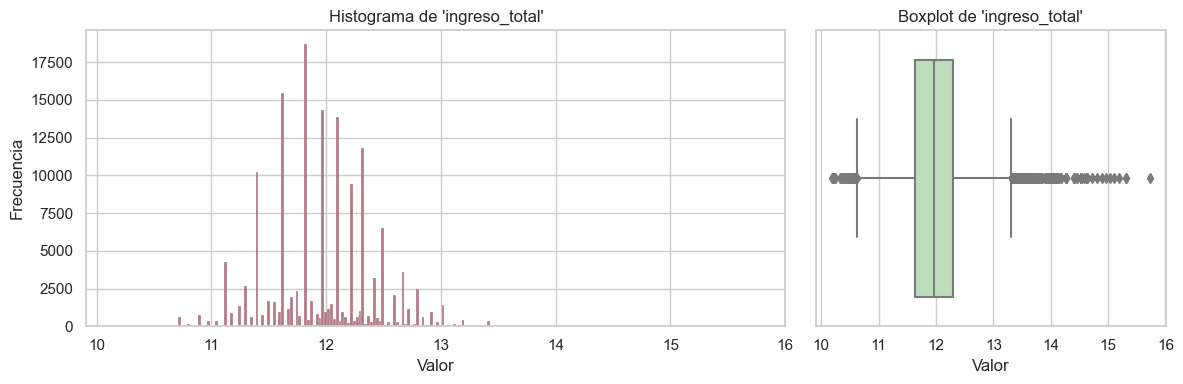

📌 'cuota_periodica': 1,186 outliers detectados (fuera de [8.67, 11.57])


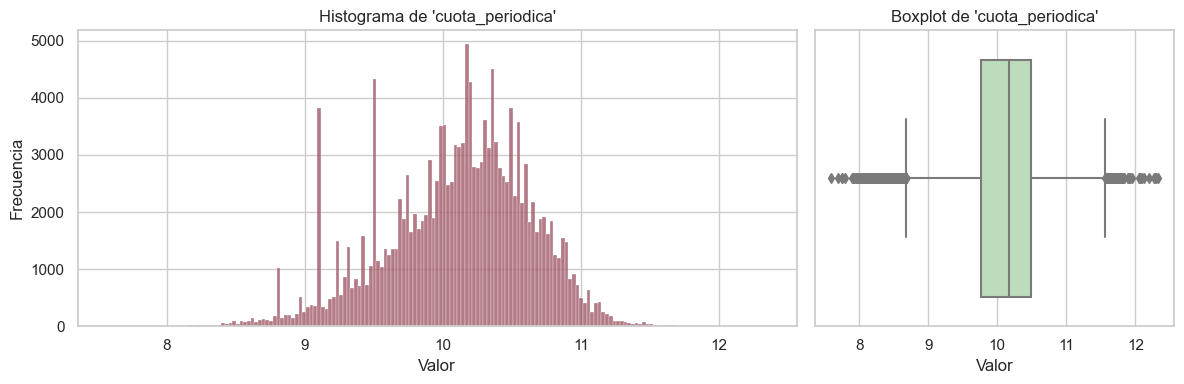

📌 'poblacion_relativa_region': 3,313 outliers detectados (fuera de [-0.02, 0.06])


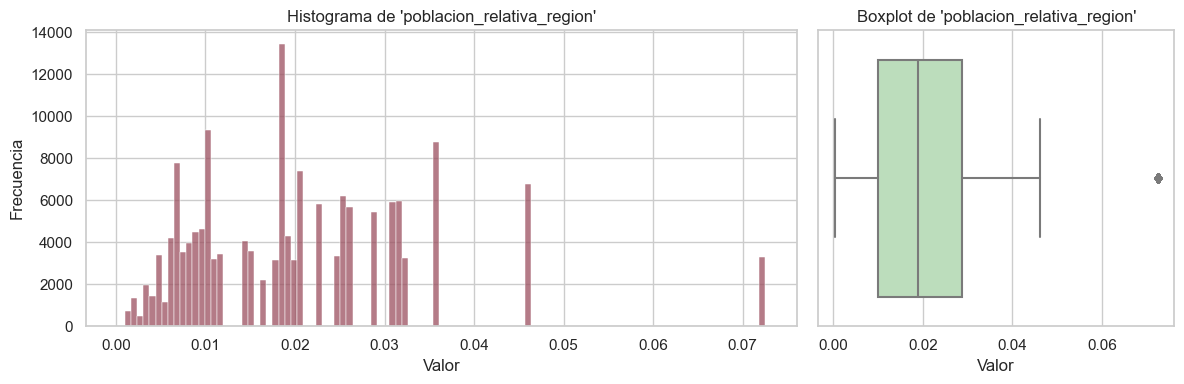

📌 'dias_desde_nacimiento': 0 outliers detectados (fuera de [-25994.00, -3570.00])


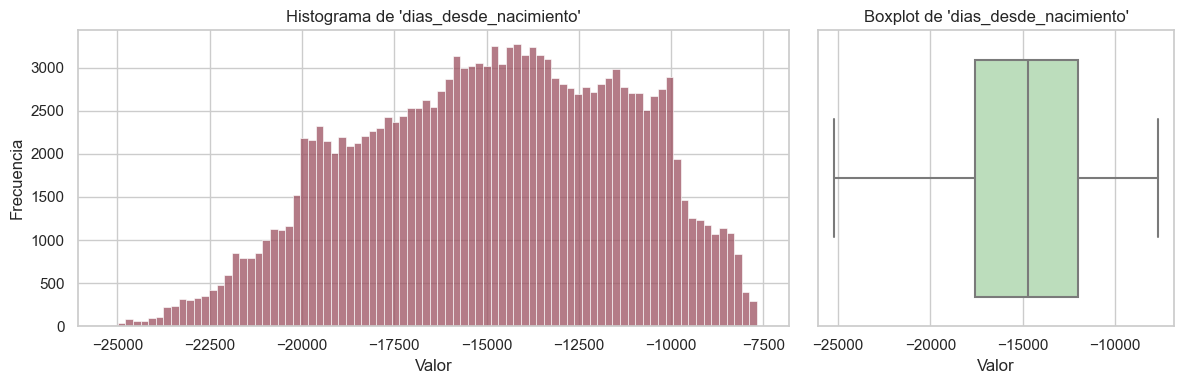

📌 'dias_desde_registro': 357 outliers detectados (fuera de [-14603.50, 5800.50])


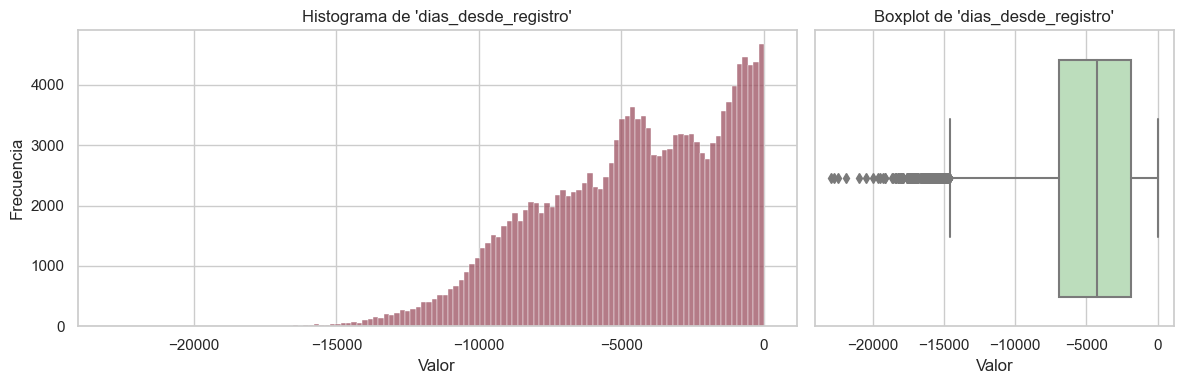

📌 'dias_desde_emision_id': 0 outliers detectados (fuera de [-8149.50, 2342.50])


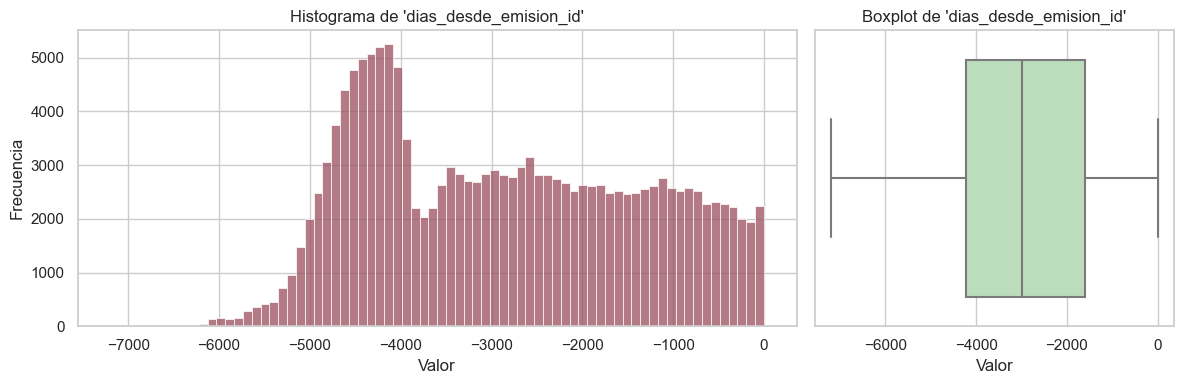

📌 'numero_miembros_familia': 2,525 outliers detectados (fuera de [0.50, 4.50])


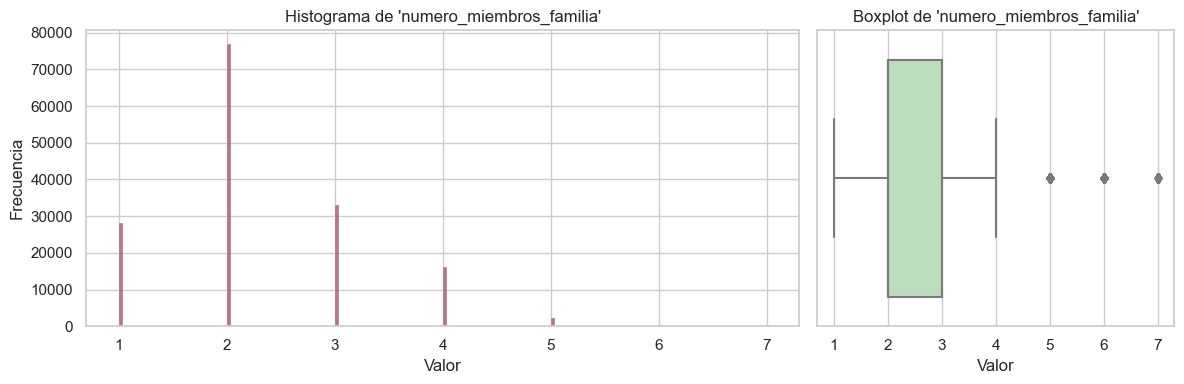

📌 'fuente_externa_2': 749 outliers detectados (fuera de [0.01, 1.05])


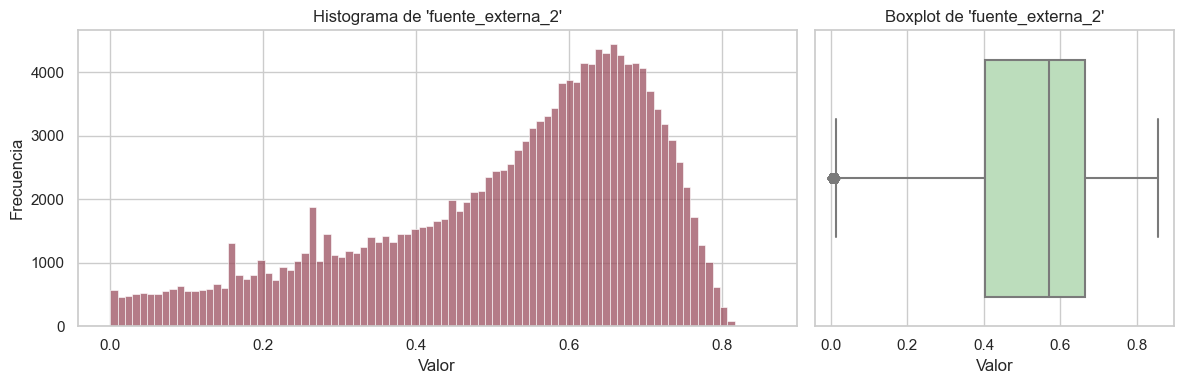

📌 'fuente_externa_3': 0 outliers detectados (fuera de [-0.09, 1.11])


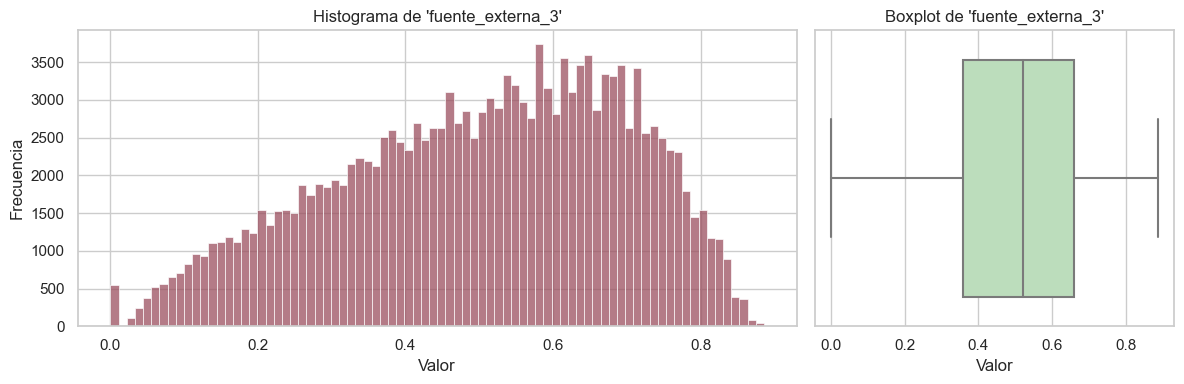

📌 'consultas_buro_anio': 42 outliers detectados (fuera de [-0.35, 2.43])


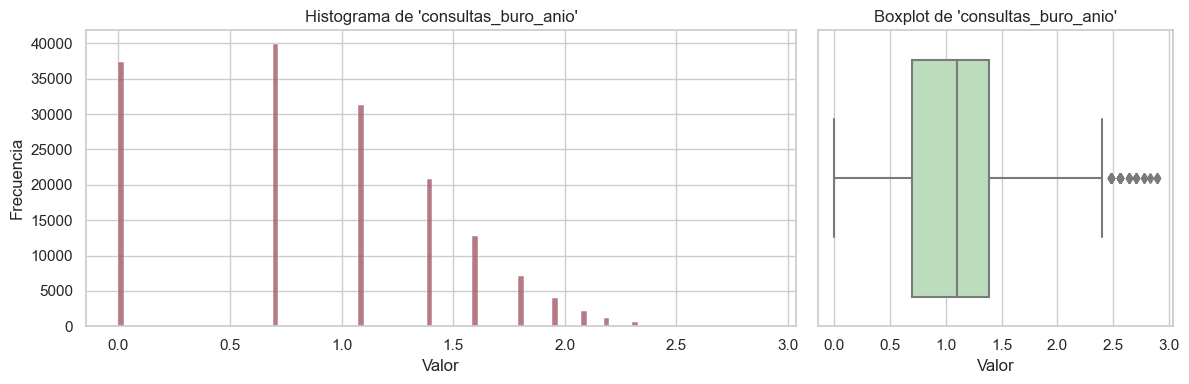

📌 'entradas_buro': 192 outliers detectados (fuera de [0.17, 3.41])


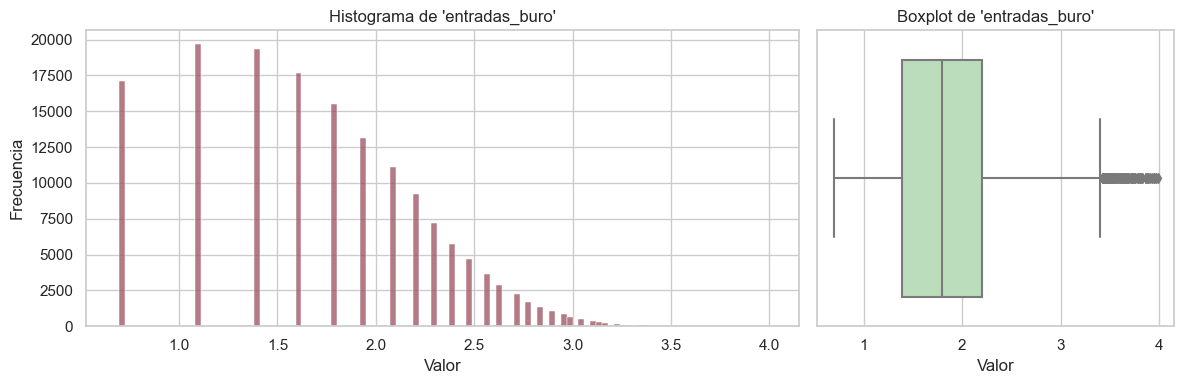

📌 'tipos_credito_activo': 1 outliers detectados (fuera de [-0.50, 3.50])


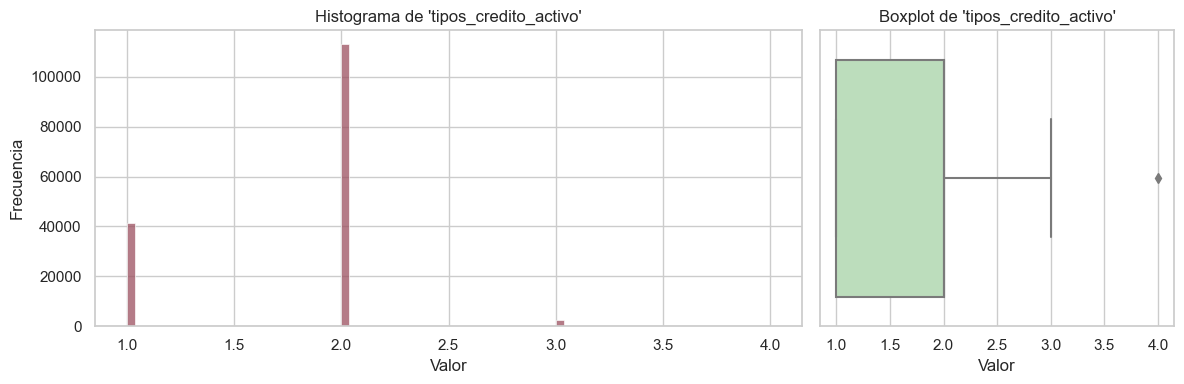

📌 'suma_total_credito': 1,666 outliers detectados (fuera de [10.06, 17.61])


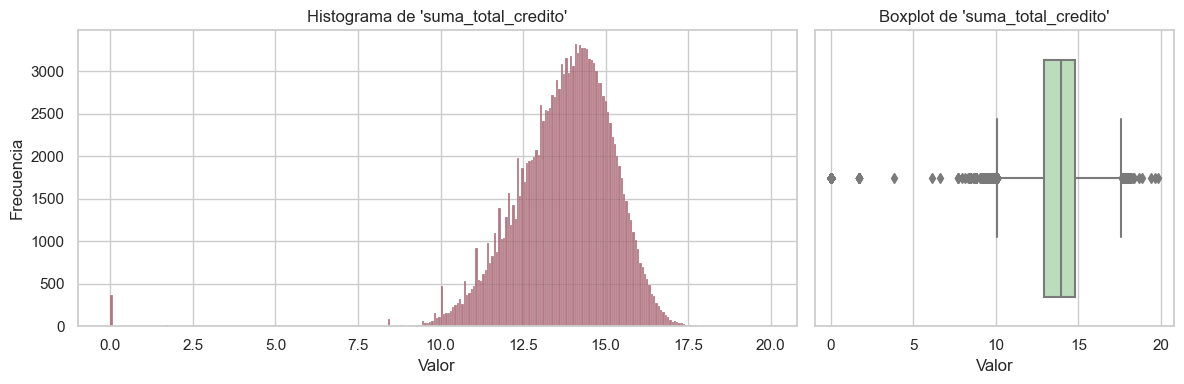

📌 'cantidad_solicitudes_previas': 123 outliers detectados (fuera de [-0.37, 3.55])


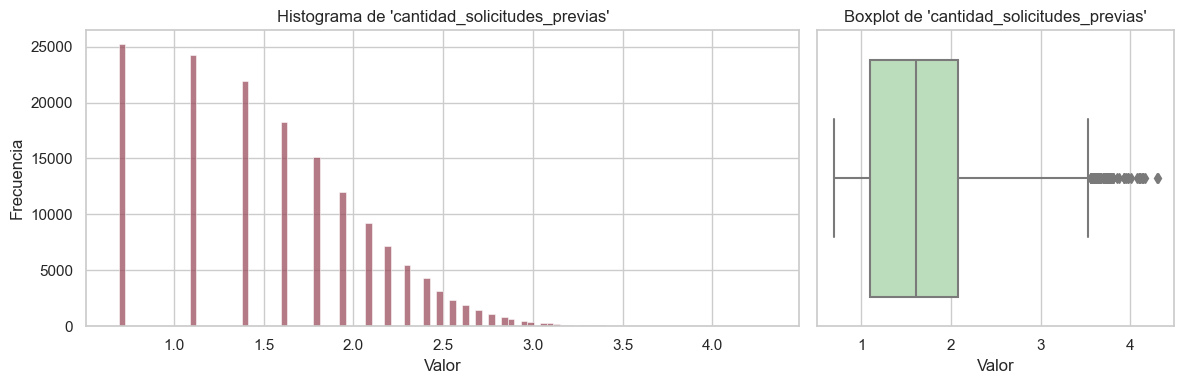

📌 'monto_promedio_solicitudes': 1,204 outliers detectados (fuera de [9.31, 13.87])


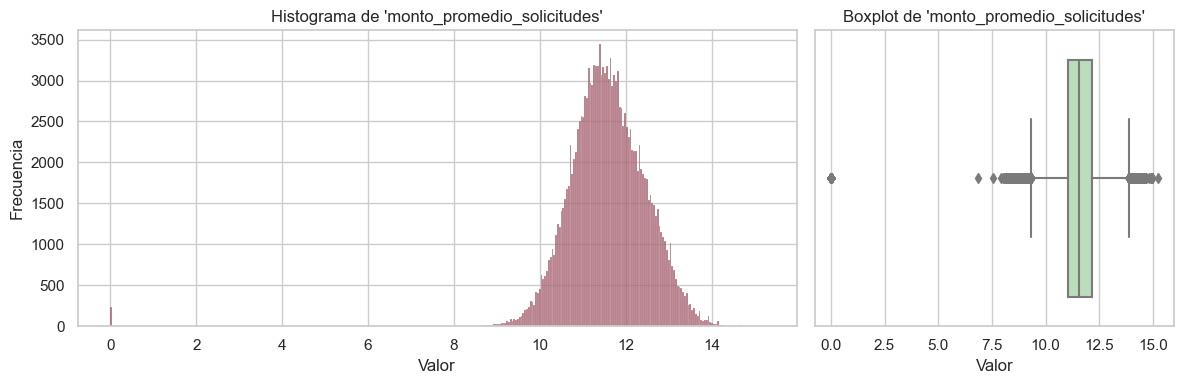

📌 'monto_total_credito': 30 outliers detectados (fuera de [9.04, 16.97])


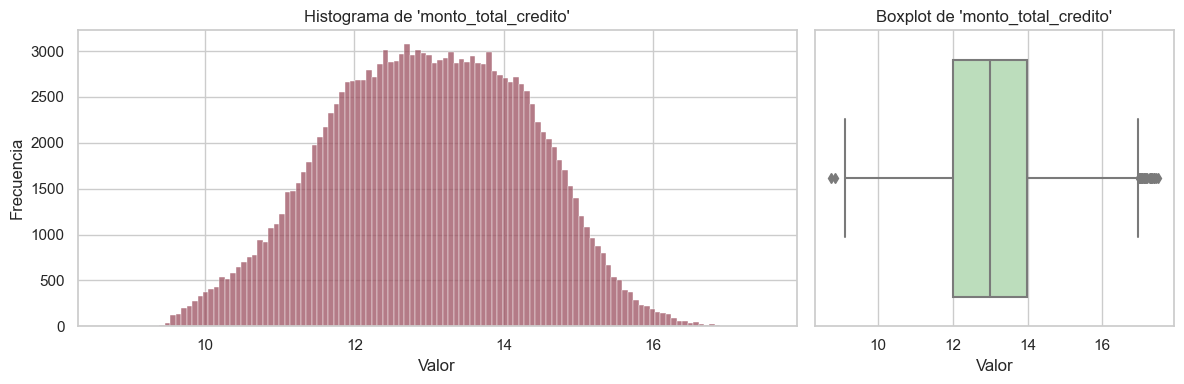

📌 'cuentas_pos_cash': 9 outliers detectados (fuera de [0.88, 5.37])


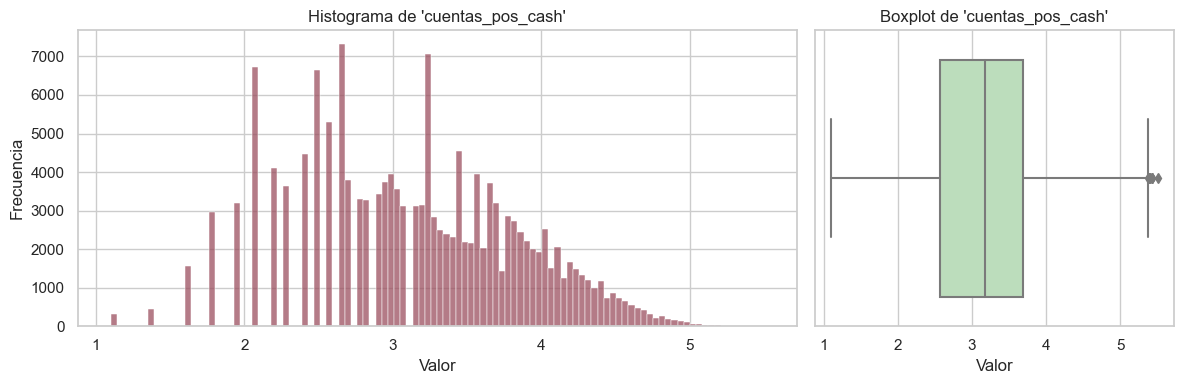

📌 'promedio_meses_saldo': 1,271 outliers detectados (fuera de [-87.38, 26.03])


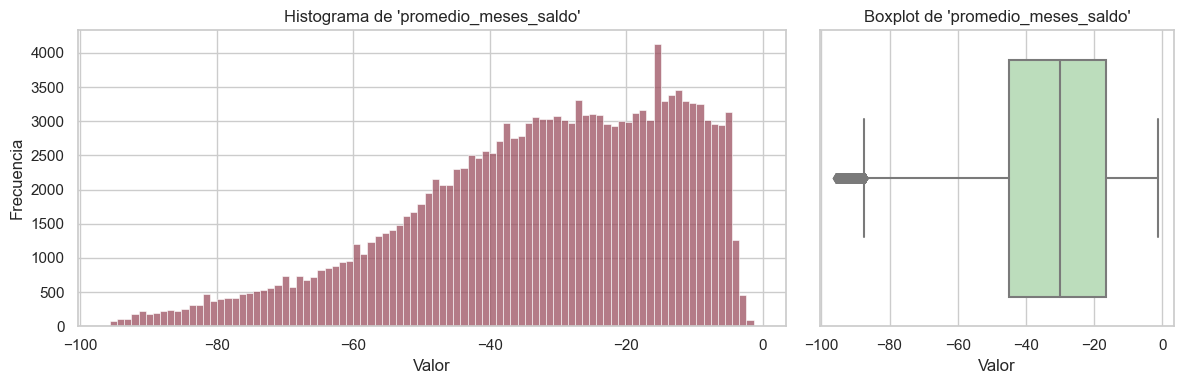

📌 'total_cuotas': 0 outliers detectados (fuera de [0.49, 6.03])


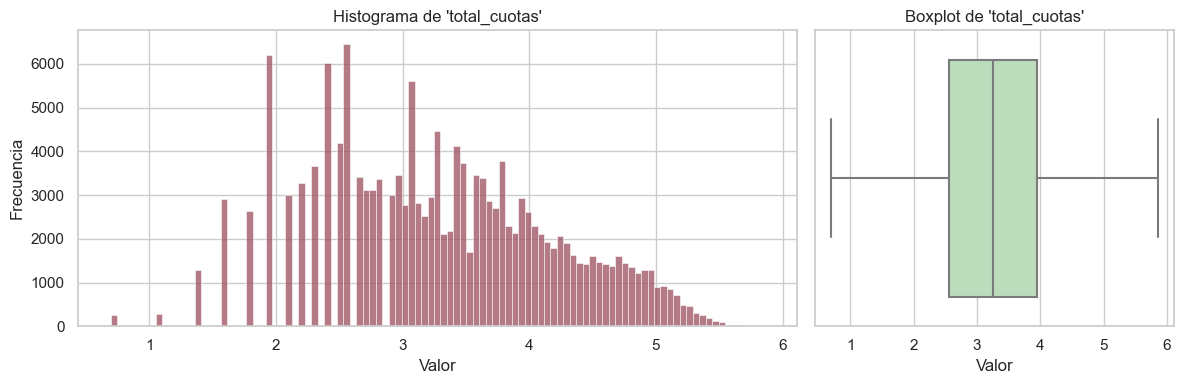

📌 'total_pagado': 58 outliers detectados (fuera de [9.07, 16.40])


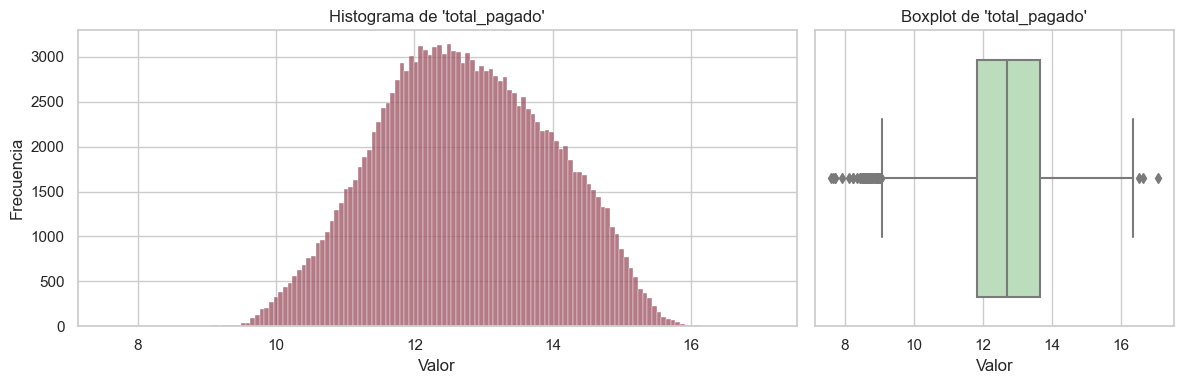

📌 'promedio_dias_entre_registro_y_pago': 837 outliers detectados (fuera de [-2628.62, 836.14])


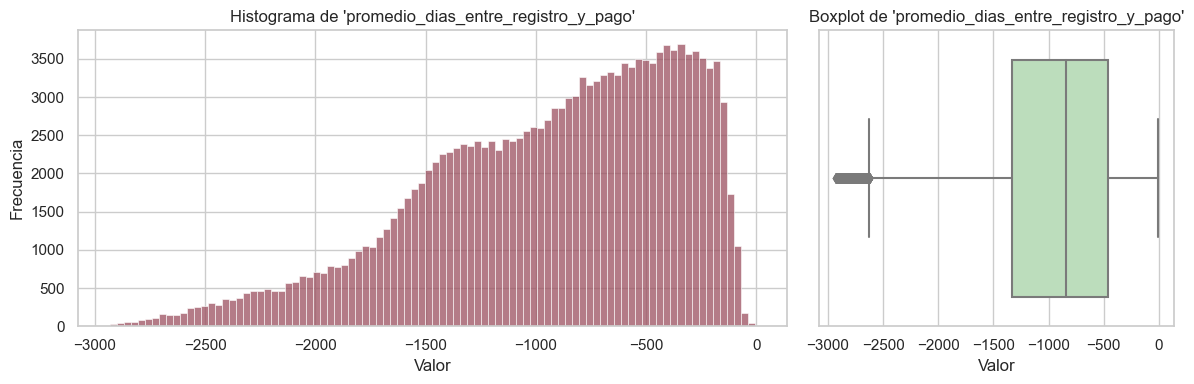

In [46]:
for col in numericas_no_dummies:
    try:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        num_outliers = outliers.shape[0]

        fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})
        sns.histplot(data=df, x=col, ax=axes[0], color="#9B4F5F", kde=False)
        axes[0].set_title(f"Histograma de '{col}'")
        axes[0].set_xlabel("Valor")
        axes[0].set_ylabel("Frecuencia")

        sns.boxplot(data=df, x=col, ax=axes[1], color="#b6e2b6")
        axes[1].set_title(f"Boxplot de '{col}'")
        axes[1].set_xlabel("Valor")
        axes[1].set_yticks([])

        print(f"📌 '{col}': {num_outliers:,} outliers detectados (fuera de [{limite_inferior:.2f}, {limite_superior:.2f}])")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error procesando la columna '{col}': {e}")


### 3.7.8. Exploración Descriptiva de Variables Filtradas

In [47]:
def build_my_info_table(df):
    info = []

    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique(dropna=True)
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        # Agregar estadísticas solo si es numérica
        if pd.api.types.is_numeric_dtype(data):
            media = data.mean()
            std = data.std()
            minimo = data.min()
            maximo = data.max()
            q1 = data.quantile(0.25)
            mediana = data.median()
            q3 = data.quantile(0.75)
        else:
            media = std = minimo = maximo = q1 = mediana = q3 = None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
            'moda': moda,
            'moda (%)': round(moda_pct, 2) if moda_pct else None,
            'media': round(media, 2) if media is not None else None,
            'desv. estándar': round(std, 2) if std is not None else None,
            'mínimo': minimo,
            'Q1': q1,
            'mediana': mediana,
            'Q3': q3,
            'máximo': maximo
        })

    # Imprimir resumen general
    print(f"Dimensiones del DataFrame: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    num_con_nulos = sum([1 for col in df.columns if df[col].isnull().any()])
    print(f"Variables con al menos un valor nulo: {num_con_nulos}")

    return pd.DataFrame(info).sort_values(by='nulos (#)', ascending=False).reset_index(drop=True)

# Aplicar función y guardar resultado
tabla_variables = build_my_info_table(df)

# Mostrar tabla
tabla_variables.head()

Dimensiones del DataFrame: 156,882 filas x 54 columnas
Variables con al menos un valor nulo: 0


columna    dtype  nulos (#)  nulos (%)  nunique  \
0   incumplimiento_credito    int64          0        0.0        2   
1       consultas_buro_mes    int32          0        0.0        2   
2         fuente_externa_2  float64          0        0.0    86596   
3         fuente_externa_3  float64          0        0.0      794   
4  incumplimientos_30_dias    int32          0        0.0        2   

                     unique      moda  moda (%)  media  desv. estándar  \
0                    [1, 0]         0     91.45   0.09            0.28   
1                    [0, 1]         0     82.22   0.18            0.38   
2  Más de 10 valores únicos  0.285898      0.25   0.52            0.19   
3  Más de 10 valores únicos    0.7463      0.52   0.50            0.20   
4                    [1, 0]         0     88.57   0.11            0.32   

     mínimo        Q1   mediana        Q3    máximo  
0  0.000000  0.000000  0.000000  0.000000  1.000000  
1  0.000000  0.000000  0.000000  0.000000  1.000000  
2  0.000005  0.403418  0.569460  0.663778  0.855000  
3  0.000527  0.357293  0.520898  0.657784  0.885488  
4  0.000000  0.000000  0.000000  0.000000  1.000000

### 3.7.9. Clasificación de Variables

In [48]:
# Clasificación de variables para el df transformado

# 1. Variables categóricas (tipo object)
categoricas = df.select_dtypes(include='object').columns.tolist()

# 2. Dummies: tipo int64 con solo 2 valores únicos
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 3. Variables numéricas reales (más de 2 valores únicos o tipo float64)
numericas = tabla_variables[
    (
        (tabla_variables['dtype'] == 'int64') & (tabla_variables['nunique'] > 2)
    ) | (
        tabla_variables['dtype'] == 'float64'
    )
]['columna'].tolist()

# Mostrar resultados
print(f"Variables categóricas ({len(categoricas)}): {categoricas}")
print(f"Variables dummies ({len(dummies)}): {dummies}")
print(f"Variables numéricas ({len(numericas)}): {numericas}")

# Mostrar shape final
print(f"Shape del DataFrame: {df.shape}")

Variables categóricas (9): ['acompanantes_solicitud', 'tipo_ingreso', 'nivel_educativo', 'estado_civil', 'tipo_vivienda', 'ocupacion', 'dia_solicitud', 'hora_solicitud', 'tipo_organizacion']
Variables dummies (11): ['incumplimiento_credito', 'documento_3', 'documento_6', 'documento_8', 'ciudad_residencia_distinta_trabajo', 'trabaja_fuera_ciudad_registrada', 'vive_fuera_ciudad_registrada', 'telefono_trabajo', 'telefono_personal', 'tiene_email', 'trabaja_fuera_region_registrada']
Variables numéricas (21): ['fuente_externa_2', 'fuente_externa_3', 'consultas_buro_anio', 'entradas_buro', 'tipos_credito_activo', 'suma_total_credito', 'cantidad_solicitudes_previas', 'monto_promedio_solicitudes', 'monto_total_credito', 'cuentas_pos_cash', 'promedio_meses_saldo', 'total_cuotas', 'total_pagado', 'ingreso_total', 'cuota_periodica', 'poblacion_relativa_region', 'dias_desde_nacimiento', 'dias_desde_registro', 'dias_desde_emision_id', 'numero_miembros_familia', 'promedio_dias_entre_registro_y_pago']

## 3.8. Gráficas de Variables Dummies

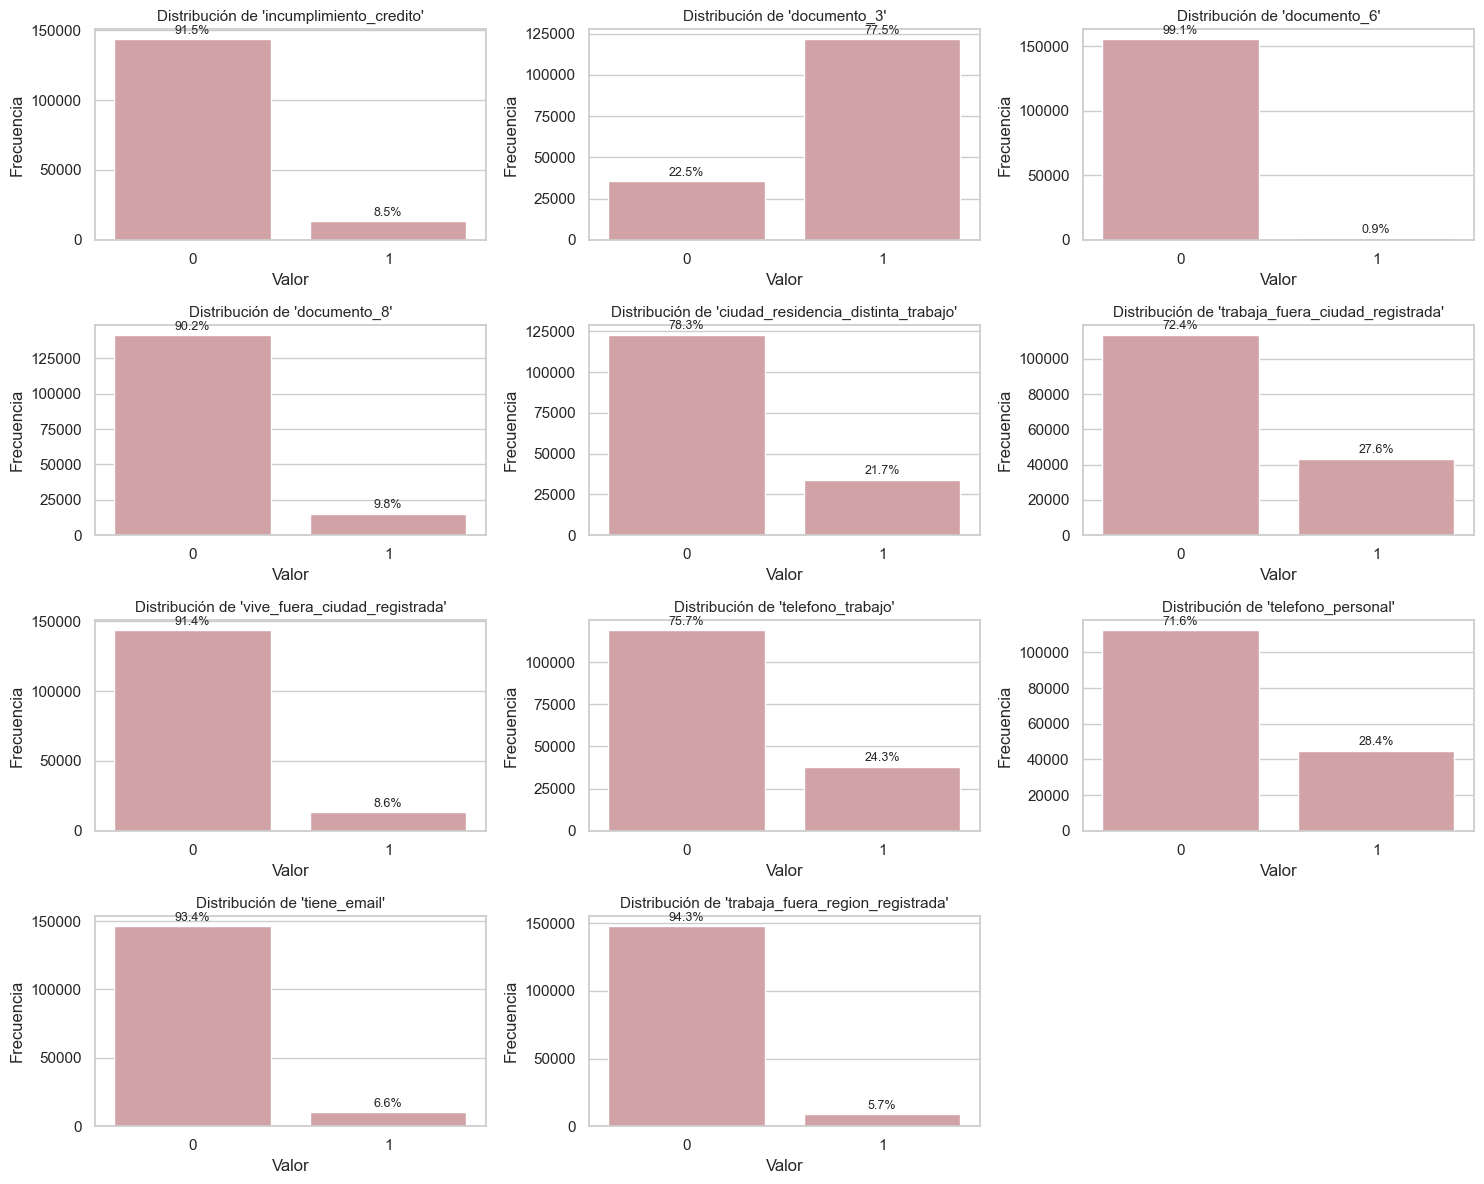

In [49]:
# 1. Dummies (int64 con solo 2 categorías):
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 2. Definir estilo gráfico
sns.set(style="whitegrid")

# 4. Parámetros para layout
n = len(dummies)
cols = 3
rows = (n // cols) + (n % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
axes = axes.flatten()

# 5. Crear gráfico de barras para cada dummy con porcentaje
for i, col in enumerate(dummies):
    conteo = df[col].value_counts().sort_index()
    total = conteo.sum()
    porcentaje = conteo / total * 100

    sns.barplot(x=conteo.index.astype(str), y=conteo.values, ax=axes[i], color="#d89ca1")
    axes[i].set_title(f"Distribución de '{col}'", fontsize=11)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

    # Mostrar porcentaje sobre cada barra
    for j, val in enumerate(conteo.values):
        axes[i].text(j, val + total * 0.01, f"{porcentaje.iloc[j]:.1f}%",
                     ha='center', va='bottom', fontsize=9)

# 6. Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3.9. Exploración Descriptiva de Variables Finales

In [50]:
def build_my_info_table(df):
    info = []

    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique(dropna=True)
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        # Agregar estadísticas solo si es numérica
        if pd.api.types.is_numeric_dtype(data):
            media = data.mean()
            std = data.std()
            minimo = data.min()
            maximo = data.max()
            q1 = data.quantile(0.25)
            mediana = data.median()
            q3 = data.quantile(0.75)
        else:
            media = std = minimo = maximo = q1 = mediana = q3 = None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
            'moda': moda,
            'moda (%)': round(moda_pct, 2) if moda_pct else None,
            'media': round(media, 2) if media is not None else None,
            'desv. estándar': round(std, 2) if std is not None else None,
            'mínimo': minimo,
            'Q1': q1,
            'mediana': mediana,
            'Q3': q3,
            'máximo': maximo
        })

    # Imprimir resumen general
    print(f"Dimensiones del DataFrame: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    num_con_nulos = sum([1 for col in df.columns if df[col].isnull().any()])
    print(f"Variables con al menos un valor nulo: {num_con_nulos}")

    return pd.DataFrame(info).sort_values(by='nulos (#)', ascending=False).reset_index(drop=True)

# Aplicar función y guardar resultado
tabla_variables = build_my_info_table(df)

# Mostrar tabla
tabla_variables.head(5)

Dimensiones del DataFrame: 156,882 filas x 54 columnas
Variables con al menos un valor nulo: 0


columna    dtype  nulos (#)  nulos (%)  nunique  \
0   incumplimiento_credito    int64          0        0.0        2   
1       consultas_buro_mes    int32          0        0.0        2   
2         fuente_externa_2  float64          0        0.0    86596   
3         fuente_externa_3  float64          0        0.0      794   
4  incumplimientos_30_dias    int32          0        0.0        2   

                     unique      moda  moda (%)  media  desv. estándar  \
0                    [1, 0]         0     91.45   0.09            0.28   
1                    [0, 1]         0     82.22   0.18            0.38   
2  Más de 10 valores únicos  0.285898      0.25   0.52            0.19   
3  Más de 10 valores únicos    0.7463      0.52   0.50            0.20   
4                    [1, 0]         0     88.57   0.11            0.32   

     mínimo        Q1   mediana        Q3    máximo  
0  0.000000  0.000000  0.000000  0.000000  1.000000  
1  0.000000  0.000000  0.000000  0.000000  1.000000  
2  0.000005  0.403418  0.569460  0.663778  0.855000  
3  0.000527  0.357293  0.520898  0.657784  0.885488  
4  0.000000  0.000000  0.000000  0.000000  1.000000

In [51]:
# 1. Variables categóricas (object):
categoricas = tabla_variables[
    tabla_variables['dtype'] == 'object'
]['columna'].tolist()

# 2. Dummies (int64 con solo 2 categorías):
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 3. Variables numéricas que no son dummies (int64 con más de 2 valores únicos o float64):
numericas = tabla_variables[
    (
        (tabla_variables['dtype'] == 'int64') & (tabla_variables['nunique'] > 2)
    ) | (
        tabla_variables['dtype'] == 'float64'
    )
]['columna'].tolist()

print(f"Categóricas ({len(categoricas)}):", categoricas)
print(f"Dummies ({len(dummies)}):", dummies)
print(f"Numéricas ({len(numericas)}):", numericas)

Categóricas (9): ['tipo_organizacion', 'acompanantes_solicitud', 'tipo_ingreso', 'nivel_educativo', 'estado_civil', 'tipo_vivienda', 'ocupacion', 'dia_solicitud', 'hora_solicitud']
Dummies (11): ['incumplimiento_credito', 'documento_3', 'documento_6', 'documento_8', 'ciudad_residencia_distinta_trabajo', 'trabaja_fuera_ciudad_registrada', 'vive_fuera_ciudad_registrada', 'telefono_trabajo', 'telefono_personal', 'tiene_email', 'trabaja_fuera_region_registrada']
Numéricas (21): ['fuente_externa_2', 'fuente_externa_3', 'consultas_buro_anio', 'entradas_buro', 'tipos_credito_activo', 'suma_total_credito', 'cantidad_solicitudes_previas', 'monto_promedio_solicitudes', 'monto_total_credito', 'cuentas_pos_cash', 'promedio_meses_saldo', 'total_cuotas', 'total_pagado', 'ingreso_total', 'cuota_periodica', 'poblacion_relativa_region', 'dias_desde_nacimiento', 'dias_desde_registro', 'dias_desde_emision_id', 'numero_miembros_familia', 'promedio_dias_entre_registro_y_pago']


## 3.10. Guardar Base de Datos Final

In [52]:
# Guardar el dataset consolidado como CSV
df.to_csv('/content/credit_risk_final.csv', index=False)
print("Archivo guardado exitosamente como 'credit_risk_final.csv'")

Archivo guardado exitosamente como 'credit_risk_final.csv'


# 4.Estratificación aleatoria de la Base de datos

## 4.1. Cargar Base de Datos Final

In [53]:
# Cargar el archivo consolidado desde la ruta
df = pd.read_csv('/content/credit_risk_final.csv')

# Verificar que se cargó correctamente
print("Dataset cargado correctamente. Dimensiones:", df.shape)

Dataset cargado correctamente. Dimensiones: (156882, 54)


## 4.2. Exploración Descriptiva de Variables Finales

In [54]:
def build_my_info_table(df):
    info = []

    for col in df.columns:
        data = df[col]
        tipo = data.dtype
        nulos = data.isnull().sum()
        nulos_pct = 100 * nulos / len(df)
        nunique = data.nunique(dropna=True)
        valores_unicos = data.unique() if nunique <= 10 else 'Más de 10 valores únicos'
        moda = data.mode().iloc[0] if not data.mode().empty else None
        moda_freq = data.value_counts().iloc[0] if not data.value_counts().empty else None
        moda_pct = 100 * moda_freq / len(df) if moda_freq else None

        # Agregar estadísticas solo si es numérica
        if pd.api.types.is_numeric_dtype(data):
            media = data.mean()
            std = data.std()
            minimo = data.min()
            maximo = data.max()
            q1 = data.quantile(0.25)
            mediana = data.median()
            q3 = data.quantile(0.75)
        else:
            media = std = minimo = maximo = q1 = mediana = q3 = None

        info.append({
            'columna': col,
            'dtype': tipo,
            'nulos (#)': nulos,
            'nulos (%)': round(nulos_pct, 2),
            'nunique': nunique,
            'unique': valores_unicos,
            'moda': moda,
            'moda (%)': round(moda_pct, 2) if moda_pct else None,
            'media': round(media, 2) if media is not None else None,
            'desv. estándar': round(std, 2) if std is not None else None,
            'mínimo': minimo,
            'Q1': q1,
            'mediana': mediana,
            'Q3': q3,
            'máximo': maximo
        })

    # Imprimir resumen general
    print(f"Dimensiones del DataFrame: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    num_con_nulos = sum([1 for col in df.columns if df[col].isnull().any()])
    print(f"Variables con al menos un valor nulo: {num_con_nulos}")

    return pd.DataFrame(info).sort_values(by='nulos (#)', ascending=False).reset_index(drop=True)

# Aplicar función y guardar resultado
tabla_variables = build_my_info_table(df)

# Mostrar tabla
tabla_variables.head(5)


Dimensiones del DataFrame: 156,882 filas x 54 columnas
Variables con al menos un valor nulo: 0


columna    dtype  nulos (#)  nulos (%)  nunique  \
0   incumplimiento_credito    int64          0        0.0        2   
1       consultas_buro_mes    int64          0        0.0        2   
2         fuente_externa_2  float64          0        0.0    86596   
3         fuente_externa_3  float64          0        0.0      794   
4  incumplimientos_30_dias    int64          0        0.0        2   

                     unique      moda  moda (%)  media  desv. estándar  \
0                    [1, 0]         0     91.45   0.09            0.28   
1                    [0, 1]         0     82.22   0.18            0.38   
2  Más de 10 valores únicos  0.285898      0.25   0.52            0.19   
3  Más de 10 valores únicos    0.7463      0.52   0.50            0.20   
4                    [1, 0]         0     88.57   0.11            0.32   

     mínimo        Q1   mediana        Q3    máximo  
0  0.000000  0.000000  0.000000  0.000000  1.000000  
1  0.000000  0.000000  0.000000  0.000000  1.000000  
2  0.000005  0.403418  0.569460  0.663778  0.855000  
3  0.000527  0.357293  0.520898  0.657784  0.885488  
4  0.000000  0.000000  0.000000  0.000000  1.000000

## 4.3. Separar Variables de acuerdo a su Clasificación

In [55]:
# 1. Variables categóricas (object):
categoricas = tabla_variables[
    tabla_variables['dtype'] == 'object'
]['columna'].tolist()

# 2. Dummies (int64 con solo 2 categorías):
dummies = tabla_variables[
    (tabla_variables['dtype'] == 'int64') &
    (tabla_variables['nunique'] == 2)
]['columna'].tolist()

# 3. Variables numéricas que no son dummies (int64 con más de 2 valores únicos o float64):
numericas = tabla_variables[
    (
        (tabla_variables['dtype'] == 'int64') & (tabla_variables['nunique'] > 2)
    ) | (
        tabla_variables['dtype'] == 'float64'
    )
]['columna'].tolist()

print(f"Categóricas ({len(categoricas)}):", categoricas)
print(f"Dummies ({len(dummies)}):", dummies)
print(f"Numéricas ({len(numericas)}):", numericas)

Categóricas (10): ['tipo_organizacion', 'numero_hijos', 'acompanantes_solicitud', 'tipo_ingreso', 'nivel_educativo', 'estado_civil', 'tipo_vivienda', 'ocupacion', 'dia_solicitud', 'hora_solicitud']
Dummies (23): ['incumplimiento_credito', 'consultas_buro_mes', 'incumplimientos_30_dias', 'default_60_dias_circulo_social', 'dias_ultimo_cambio_telefono', 'documento_3', 'documento_6', 'documento_8', 'consultas_buro_hora', 'consultas_buro_dia', 'consultas_buro_semana', 'consultas_buro_trimestre', 'tipo_contrato', 'ciudad_residencia_distinta_trabajo', 'trabaja_fuera_ciudad_registrada', 'vive_fuera_ciudad_registrada', 'genero', 'posee_auto', 'posee_vivienda', 'telefono_trabajo', 'telefono_personal', 'tiene_email', 'trabaja_fuera_region_registrada']
Numéricas (21): ['fuente_externa_2', 'fuente_externa_3', 'consultas_buro_anio', 'entradas_buro', 'tipos_credito_activo', 'suma_total_credito', 'cantidad_solicitudes_previas', 'monto_promedio_solicitudes', 'monto_total_credito', 'cuentas_pos_cash', '

## 4.4. Estratificación 50%

In [56]:
df_stratificado, _ = train_test_split(
    df,
    test_size=0.5,  # Mantener solo el 50%
    stratify=df['incumplimiento_credito'],  # Mantener proporciones de clases
    random_state=42  # Para reproducibilidad
)

# Mostrar forma y proporción de clases
print(f"Tamaño del dataset estratificado: {df_stratificado.shape}")
print("Distribución de clases en 'incumplimiento_credito':")
print(df_stratificado['incumplimiento_credito'].value_counts(normalize=True).round(3))

Tamaño del dataset estratificado: (78441, 54)
Distribución de clases en 'incumplimiento_credito':
incumplimiento_credito
0    0.915
1    0.085
Name: proportion, dtype: float64


## 4.5. Guardar Base de Datos The End

In [57]:
# Guardar el dataset consolidado como CSV
df.to_csv('/content/credit_risk_the_end.csv', index=False)
print("Archivo guardado exitosamente como 'credit_risk_the_end.csv'")

Archivo guardado exitosamente como 'credit_risk_the_end.csv'
